<br>
<br>
**<font size=8><center>Milestone 2</center></font>**

**<font size=6>Introduction</font>**

Below are a series of visualizations that provide insight into which models and which variables will be most effective in predicting loan default rates using Lending Club data. Graphs included are Histograms, Pie Charts, Geographical Heatmaps, Correlation Heatmaps, Dendograms, Boxcharts, and Scatterplots. **SUMMARY OF RESULTS**

### Authors:
Devon Luongo <br>
Ankit Agarwal <br>
Bryn Clark <br>
Ben Yuen

### Libraries:

In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy
%matplotlib inline

In [10]:
path = "/home/ankit/anaconda2/pkgs/basemap-1.0.7-np111py27_0/lib/python2.7/site-packages/mpl_toolkits/basemap/data/"

**<font size=6>Data Cleaning</font>**

Some of the data files have fields that contain NAs for older time periods. In order to collapse the data sets into one file, all numerical data will be stored in float fields (integer fields do not support NA missing values). To do this, we first define a conversion dictionary that stores the numeric fields with lookups to the *float* data type.

In [11]:
convert_float = dict([s, float] for s in
                     ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
                      'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',                      
                      'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
                      'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                      'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                      'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog',
                      'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 
                      'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 
                      'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 
                      'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 
                      'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
                      'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
                      'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
                      'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
                      'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 
                      'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
                      'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
                      'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
                      'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
                      'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'])

We also define a dictionary of string fields, to handle situations where the inferred data type might be numeric even though the field should be read in as a string/object.

In [12]:
convert_str = dict([s, str] for s in
                    ['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 
                     'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 
                     'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 
                     'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
                     'policy_code', 'application_type', 'verification_status_joint'])

We read the input data from the CSV data files using pandas *read_csv*. There is a blank row in the data header and there are two blank rows in the footer of each file. To allow the use of *skip_footer*, we use the python engine rather than the C engine. The first two columns (*id* and *member_id*) are unique and used to create a table index.

In [79]:
data_2007_2011 = pd.read_csv("./data/LoanStats3a.csv",
                   skiprows=1,
                   skip_footer=2,
                   engine="python",
                   na_values=['NaN', 'nan'],
                   converters=convert_str,
                   index_col=[0,1])

data_2014 = pd.read_csv("./data/LoanStats3b.csv",
                   skiprows=1,
                   skip_footer=2,
                   engine="python",
                   na_values=['NaN', 'nan'],
                   converters=convert_str,
                   index_col=[0,1])

data_2015 = pd.read_csv("./data/LoanStats3c.csv",
                   skiprows=1,
                   skip_footer=2,
                   engine="python",
                   na_values=['NaN', 'nan'],
                   converters=convert_str,
                   index_col=[0,1])

data = pd.read_csv("./data/LoanStats3d.csv",
                   skiprows=1,
                   skip_footer=2,
                   engine="python",
                   na_values=['NaN', 'nan'],
                   converters=convert_str,
                   index_col=[0,1])

In [80]:
print "Data table dimensions 2007-2011: %d x %d" % data_2007_2011.shape

print "Data table dimensions 2014: %d x %d" % data_2014.shape
 
print "Data table dimensions 2015: %d x %d" % data_2015.shape

print "Data table dimensions 2016: %d x %d" % data.shape

Data table dimensions 2007-2011: 42536 x 109
Data table dimensions 2014: 188181 x 109
Data table dimensions 2015: 235629 x 109
Data table dimensions 2016: 421095 x 109


In [15]:
data.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  \
id       member_id                                                        
68009401 72868139       16000        16000          16000.0   60 months   
68547583 73437441        8650         8650           8650.0   36 months   
68565856 73455664        9000         9000           9000.0   36 months   
68566886 73456723       29900        29900          29900.0   60 months   
68366999 73256850       15850        15850          15850.0   60 months   

                   int_rate  installment grade sub_grade  \
id       member_id                                         
68009401 72868139    14.85%       379.39     C        C5   
68547583 73437441     5.32%       260.50     A        A1   
68565856 73455664     9.17%       286.92     B        B2   
68566886 73456723    12.88%       678.49     C        C2   
68366999 73256850    23.13%       448.01     F        F2   

                                emp_title emp_length  \
id       member_id                                     
68009401 72868139   Bookkeeper/Accounting  10+ years   
68547583 73437441    Associate Consultant   < 1 year   
68565856 73455664            Truck Driver     1 year   
68566886 73456723     Corporate Insurance  10+ years   
68366999 73256850     Lead manufacturing   10+ years   

                              ...             num_tl_90g_dpd_24m  \
id       member_id            ...                                  
68009401 72868139             ...                              0   
68547583 73437441             ...                              0   
68565856 73455664             ...                              0   
68566886 73456723             ...                              0   
68366999 73256850             ...                              0   

                    num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75  \
id       member_id                                                       
68009401 72868139                    2           78.9              0.0   
68547583 73437441                    1          100.0              0.0   
68565856 73455664                    1          100.0             33.3   
68566886 73456723                    4          100.0             25.0   
68366999 73256850                    4          100.0              0.0   

                   pub_rec_bankruptcies tax_liens tot_hi_cred_lim  \
id       member_id                                                  
68009401 72868139                     0         2          298100   
68547583 73437441                     0         0          191618   
68565856 73455664                     0         0           69818   
68566886 73456723                     0         0          271700   
68366999 73256850                     0         0           84300   

                   total_bal_ex_mort total_bc_limit total_il_high_credit_limit  
id       member_id                                                              
68009401 72868139              31329         281300                      13400  
68547583 73437441              31199          18300                      27078  
68565856 73455664              14118          15500                      16318  
68566886 73456723              42497          34000                      15574  
68366999 73256850              45025          19900                      43000  

[5 rows x 109 columns]

In [81]:
data_2015.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  \
id       member_id                                                        
38098114 40860827       15000        15000            15000   60 months   
36805548 39558264       10400        10400            10400   36 months   
37822187 40585251        9600         9600             9600   36 months   
37842129 40605224       21425        21425            21425   60 months   
37612354 40375473       12800        12800            12800   60 months   

                   int_rate  installment grade sub_grade  \
id       member_id                                         
38098114 40860827    12.39%       336.64     C        C1   
36805548 39558264     6.99%       321.08     A        A3   
37822187 40585251    13.66%       326.53     C        C3   
37842129 40605224    15.59%       516.36     D        D1   
37612354 40375473    17.14%       319.08     D        D4   

                                          emp_title emp_length  \
id       member_id                                               
38098114 40860827                        MANAGEMENT  10+ years   
36805548 39558264    Truck Driver Delivery Personel    8 years   
37822187 40585251                  Admin Specialist  10+ years   
37842129 40605224   Programming Analysis Supervisor    6 years   
37612354 40375473         Senior Sales Professional  10+ years   

                              ...             num_tl_90g_dpd_24m  \
id       member_id            ...                                  
38098114 40860827             ...                              0   
36805548 39558264             ...                              0   
37822187 40585251             ...                              0   
37842129 40605224             ...                              0   
37612354 40375473             ...                              0   

                    num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75  \
id       member_id                                                       
38098114 40860827                    4          100.0              0.0   
36805548 39558264                    4           83.3             14.3   
37822187 40585251                    3          100.0             60.0   
37842129 40605224                    2           91.4            100.0   
37612354 40375473                    0           76.9            100.0   

                   pub_rec_bankruptcies tax_liens tot_hi_cred_lim  \
id       member_id                                                  
38098114 40860827                     0         0          196500   
36805548 39558264                     0         0          179407   
37822187 40585251                     0         0           52490   
37842129 40605224                     0         0           57073   
37612354 40375473                     0         0          368700   

                   total_bal_ex_mort total_bc_limit total_il_high_credit_limit  
id       member_id                                                              
38098114 40860827             149140          10000                      12000  
36805548 39558264              15030          13000                      11325  
37822187 40585251              38566          21100                      24890  
37842129 40605224              42315          15000                      35573  
37612354 40375473              18007           4400                      18000  

[5 rows x 109 columns]

Check the count of fields by data type:

In [82]:
data_2014.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  \
id       member_id                                                        
10129506 11981122       20800        20800          20800.0   36 months   
10224583 12086734       11100        11100          11100.0   36 months   
10129477 11981093       14000        14000          14000.0   36 months   
10149577 12001118       28000        28000          28000.0   36 months   
10119590 11971211       11500        11500          11500.0   60 months   

                   int_rate  installment grade sub_grade  \
id       member_id                                         
10129506 11981122    13.53%       706.16     B        B5   
10224583 12086734    14.98%       384.68     C        C3   
10129477 11981093    12.85%       470.71     B        B4   
10149577 12001118     7.62%       872.52     A        A3   
10119590 11971211    22.90%       323.54     E        E4   

                                               emp_title emp_length  \
id       member_id                                                    
10129506 11981122                     Operations Manager  10+ years   
10224583 12086734                                Teacher  10+ years   
10129477 11981093   Assistant Director - Human Resources    4 years   
10149577 12001118                     Area Sales Manager    5 years   
10119590 11971211                              Secretary    4 years   

                              ...             num_tl_90g_dpd_24m  \
id       member_id            ...                                  
10129506 11981122             ...                            0.0   
10224583 12086734             ...                            1.0   
10129477 11981093             ...                            0.0   
10149577 12001118             ...                            0.0   
10119590 11971211             ...                            0.0   

                    num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75  \
id       member_id                                                       
10129506 11981122                  3.0           90.2             50.0   
10224583 12086734                  1.0           75.0             50.0   
10129477 11981093                  0.0           78.6            100.0   
10149577 12001118                  5.0          100.0             16.7   
10119590 11971211                  2.0          100.0             50.0   

                   pub_rec_bankruptcies tax_liens tot_hi_cred_lim  \
id       member_id                                                  
10129506 11981122                     0         0         43100.0   
10224583 12086734                     0         0        385000.0   
10129477 11981093                     1         0         31840.0   
10149577 12001118                     0         0        850886.0   
10119590 11971211                     0         0         30891.0   

                   total_bal_ex_mort total_bc_limit total_il_high_credit_limit  
id       member_id                                                              
10129506 11981122            23473.0        15000.0                        0.0  
10224583 12086734             6619.0         4000.0                        0.0  
10129477 11981093            17672.0         3900.0                    27340.0  
10149577 12001118           199739.0        42200.0                   196686.0  
10119590 11971211            24724.0         9000.0                    16791.0  

[5 rows x 109 columns]

In [83]:
data_2007_2011.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  \
id      member_id                                                        
1077501 1296599.0     5000.0       5000.0           4975.0   36 months   
1077430 1314167.0     2500.0       2500.0           2500.0   60 months   
1077175 1313524.0     2400.0       2400.0           2400.0   36 months   
1076863 1277178.0    10000.0      10000.0          10000.0   36 months   
1075358 1311748.0     3000.0       3000.0           3000.0   60 months   

                  int_rate  installment grade sub_grade  \
id      member_id                                         
1077501 1296599.0   10.65%       162.87     B        B2   
1077430 1314167.0   15.27%        59.83     C        C4   
1077175 1313524.0   15.96%        84.33     C        C5   
1076863 1277178.0   13.49%       339.31     C        C1   
1075358 1311748.0   12.69%        67.79     B        B5   

                                  emp_title emp_length  \
id      member_id                                        
1077501 1296599.0                       NaN  10+ years   
1077430 1314167.0                     Ryder   < 1 year   
1077175 1313524.0                       NaN  10+ years   
1076863 1277178.0       AIR RESOURCES BOARD  10+ years   
1075358 1311748.0  University Medical Group     1 year   

                             ...             num_tl_90g_dpd_24m  \
id      member_id            ...                                  
1077501 1296599.0            ...                            NaN   
1077430 1314167.0            ...                            NaN   
1077175 1313524.0            ...                            NaN   
1076863 1277178.0            ...                            NaN   
1075358 1311748.0            ...                            NaN   

                   num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75  \
id      member_id                                                       
1077501 1296599.0                 NaN            NaN              NaN   
1077430 1314167.0                 NaN            NaN              NaN   
1077175 1313524.0                 NaN            NaN              NaN   
1076863 1277178.0                 NaN            NaN              NaN   
1075358 1311748.0                 NaN            NaN              NaN   

                  pub_rec_bankruptcies tax_liens tot_hi_cred_lim  \
id      member_id                                                  
1077501 1296599.0                  0.0       0.0             NaN   
1077430 1314167.0                  0.0       0.0             NaN   
1077175 1313524.0                  0.0       0.0             NaN   
1076863 1277178.0                  0.0       0.0             NaN   
1075358 1311748.0                  0.0       0.0             NaN   

                  total_bal_ex_mort total_bc_limit total_il_high_credit_limit  
id      member_id                                                              
1077501 1296599.0               NaN            NaN                        NaN  
1077430 1314167.0               NaN            NaN                        NaN  
1077175 1313524.0               NaN            NaN                        NaN  
1076863 1277178.0               NaN            NaN                        NaN  
1075358 1311748.0               NaN            NaN                        NaN  

[5 rows x 109 columns]

In [84]:
print data_2007_2011.dtypes.value_counts()
print
print data_2014.dtypes.value_counts()
print
print data_2015.dtypes.value_counts()
print
data.dtypes.value_counts()

float64    83
object     26
dtype: int64

float64    69
object     26
int64      14
dtype: int64

float64    43
int64      40
object     26
dtype: int64



float64    44
int64      39
object     26
dtype: int64

Depending on the specific dataset used, the numeric values may be read in as integers. For best performance and to enable mergining of the datasets, we convert those fields to floats (which allow NaN values):

In [85]:
for k, v in convert_float.items():
    data_2007_2011[k] = data_2007_2011[k].astype(v)
    data_2014[k] = data_2014[k].astype(v)
    data_2015[k] = data_2015[k].astype(v)
    data[k] = data[k].astype(v)

Checking the data types after the float conversion:

In [86]:
print data_2007_2011.dtypes.value_counts()
print
print data_2014.dtypes.value_counts()
print
print data_2015.dtypes.value_counts()
print
data.dtypes.value_counts()

float64    83
object     26
dtype: int64

float64    83
object     26
dtype: int64

float64    83
object     26
dtype: int64



float64    83
object     26
dtype: int64

The object fields need some more processing. First, we list out those fields:

In [87]:
data.dtypes[data.dtypes=="object"]
data_2007_2011.dtypes[data_2007_2011.dtypes=="object"]
data_2014.dtypes[data_2014.dtypes=="object"]
data_2015.dtypes[data_2015.dtypes=="object"]

term                         object
int_rate                     object
grade                        object
sub_grade                    object
emp_title                    object
emp_length                   object
home_ownership               object
verification_status          object
issue_d                      object
loan_status                  object
pymnt_plan                   object
url                          object
desc                         object
purpose                      object
title                        object
zip_code                     object
addr_state                   object
earliest_cr_line             object
revol_util                   object
initial_list_status          object
last_pymnt_d                 object
next_pymnt_d                 object
last_credit_pull_d           object
policy_code                  object
application_type             object
verification_status_joint    object
dtype: object

There are 5 object fields that contain dates in the format *YYYY-MMM* (e.g. '2010-Jan'). We parse those to return datetime fields, which are more easily input into time series models or plotted in charts.

In [88]:
data.issue_d = pd.to_datetime(data.issue_d, errors="coerce")
data.last_pymnt_d = pd.to_datetime(data.last_pymnt_d, errors="coerce")
data.next_pymnt_d = pd.to_datetime(data.next_pymnt_d, errors="coerce")
data.last_credit_pull_d = pd.to_datetime(data.last_credit_pull_d, errors="coerce")
data.earliest_cr_line = pd.to_datetime(data.earliest_cr_line, errors="coerce")

data_2007_2011.issue_d = pd.to_datetime(data_2007_2011.issue_d, errors="coerce")
data_2007_2011.last_pymnt_d = pd.to_datetime(data_2007_2011.last_pymnt_d, errors="coerce")
data_2007_2011.next_pymnt_d = pd.to_datetime(data_2007_2011.next_pymnt_d, errors="coerce")
data_2007_2011.last_credit_pull_d = pd.to_datetime(data_2007_2011.last_credit_pull_d, errors="coerce")
data_2007_2011.earliest_cr_line = pd.to_datetime(data_2007_2011.earliest_cr_line, errors="coerce")

data_2014.issue_d = pd.to_datetime(data_2014.issue_d, errors="coerce")
data_2014.last_pymnt_d = pd.to_datetime(data_2014.last_pymnt_d, errors="coerce")
data_2014.next_pymnt_d = pd.to_datetime(data_2014.next_pymnt_d, errors="coerce")
data_2014.last_credit_pull_d = pd.to_datetime(data_2014.last_credit_pull_d, errors="coerce")
data_2014.earliest_cr_line = pd.to_datetime(data_2014.earliest_cr_line, errors="coerce")

data_2015.issue_d = pd.to_datetime(data_2015.issue_d, errors="coerce")
data_2015.last_pymnt_d = pd.to_datetime(data_2015.last_pymnt_d, errors="coerce")
data_2015.next_pymnt_d = pd.to_datetime(data_2015.next_pymnt_d, errors="coerce")
data_2015.last_credit_pull_d = pd.to_datetime(data_2015.last_credit_pull_d, errors="coerce")
data_2015.earliest_cr_line = pd.to_datetime(data_2015.earliest_cr_line, errors="coerce")


Many of the remaining fields contain categorical data. We use the pandas *category* data type to store the data more efficiently.

In [89]:
data.term = pd.Categorical(data.term, categories= [" 36 months", " 60 months", "None"])
data.grade = pd.Categorical(data.grade, categories=["A", "B", "C", "D", "E", "F", "G", "None"])
data.sub_grade = pd.Categorical(data.sub_grade, categories=["A1", "A2", "A3", "A4", "A5",
                                                            "B1", "B2", "B3", "B4", "B5", 
                                                            "C1", "C2", "C3", "C4", "C5",
                                                            "D1", "D2", "D3", "D4", "D5",
                                                            "E1", "E2", "E3", "E4", "E5",
                                                            "F1", "F2", "F3", "F4", "F5",
                                                            "G1", "G2", "G3", "G4", "G5",
                                                            "None"])
data.home_ownership = pd.Categorical(data.home_ownership.str.title(), categories=["Own", "Mortgage", "Rent", "Any", "Other", "None"])
data.emp_length = pd.Categorical(data.emp_length, categories=["< 1 year", "1 year", "2 years", "3 years",
                                                              "4 years", "5 years", "6 years", "7 years",
                                                              "8 years", "9 years", "10+ years", "n/a", "None"])
data.verification_status = pd.Categorical(data.verification_status, categories=["Verified", "Source Verified", "Not Verified", "None"])
data.loan_status = pd.Categorical(data.loan_status, categories=["Fully Paid", "Current", "Charged Off",
                                                                "Does not meet the credit policy. Status:Fully Paid",
                                                                "Does not meet the credit policy. Status:Charged Off",
                                                                "In Grace Period", "Late (16-30 days)", "Late (31-120 days)",
                                                                "Default", "None"])
data.pymnt_plan = pd.Categorical(data.pymnt_plan.str.title(), categories=["Y", "N", "None"])
data.purpose = pd.Categorical(data.purpose.str.title(),
                              categories=["Debt_Consolidation", "Credit_Card", "Home_Improvement", "Major_Purchase", 
                                          "Small_Business", "Car", "Wedding", "Medical", "Moving", "House",
                                          "Educational", "Vacation", "Renewable_Energy", "Other", "None"])
data.addr_state = pd.Categorical(data.addr_state,
                                 categories=["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL",
                                             "GA", "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA",
                                             "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE",
                                             "NH", "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI",
                                             "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV",
                                             "WY", "None"])
data.initial_list_status = pd.Categorical(data.initial_list_status, categories=["f", "w", "None"])
data.policy_code = pd.Categorical(data.policy_code, categories=["1", "None"])
data.application_type = pd.Categorical(data.application_type.str.title(), categories=["Individual", "Joint", "None"])
data.verification_status_joint = pd.Categorical(data.verification_status_joint, categories=["Verified", "Source Verified", "Not Verified", "None"])

In [90]:
data_2007_2011.term = pd.Categorical(data_2007_2011.term, categories= [" 36 months", " 60 months", "None"])
data_2007_2011.grade = pd.Categorical(data_2007_2011.grade, categories=["A", "B", "C", "D", "E", "F", "G", "None"])
data_2007_2011.sub_grade = pd.Categorical(data_2007_2011.sub_grade, categories=["A1", "A2", "A3", "A4", "A5",
                                                            "B1", "B2", "B3", "B4", "B5", 
                                                            "C1", "C2", "C3", "C4", "C5",
                                                            "D1", "D2", "D3", "D4", "D5",
                                                            "E1", "E2", "E3", "E4", "E5",
                                                            "F1", "F2", "F3", "F4", "F5",
                                                            "G1", "G2", "G3", "G4", "G5",
                                                            "None"])
data_2007_2011.home_ownership = pd.Categorical(data_2007_2011.home_ownership.str.title(), categories=["Own", "Mortgage", "Rent", "Any", "Other", "None"])
data_2007_2011.emp_length = pd.Categorical(data_2007_2011.emp_length, categories=["< 1 year", "1 year", "2 years", "3 years",
                                                              "4 years", "5 years", "6 years", "7 years",
                                                              "8 years", "9 years", "10+ years", "n/a", "None"])
data_2007_2011.verification_status = pd.Categorical(data_2007_2011.verification_status, categories=["Verified", "Source Verified", "Not Verified", "None"])
data_2007_2011.loan_status = pd.Categorical(data_2007_2011.loan_status, categories=["Fully Paid", "Current", "Charged Off",
                                                                "Does not meet the credit policy. Status:Fully Paid",
                                                                "Does not meet the credit policy. Status:Charged Off",
                                                                "In Grace Period", "Late (16-30 days)", "Late (31-120 days)",
                                                                "Default", "None"])
data_2007_2011.pymnt_plan = pd.Categorical(data_2007_2011.pymnt_plan.str.title(), categories=["Y", "N", "None"])
data_2007_2011.purpose = pd.Categorical(data_2007_2011.purpose.str.title(),
                              categories=["Debt_Consolidation", "Credit_Card", "Home_Improvement", "Major_Purchase", 
                                          "Small_Business", "Car", "Wedding", "Medical", "Moving", "House",
                                          "Educational", "Vacation", "Renewable_Energy", "Other", "None"])
data_2007_2011.addr_state = pd.Categorical(data_2007_2011.addr_state,
                                 categories=["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL",
                                             "GA", "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA",
                                             "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE",
                                             "NH", "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI",
                                             "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV",
                                             "WY", "None"])
data_2007_2011.initial_list_status = pd.Categorical(data_2007_2011.initial_list_status, categories=["f", "w", "None"])
data_2007_2011.policy_code = pd.Categorical(data_2007_2011.policy_code, categories=["1", "None"])
data_2007_2011.application_type = pd.Categorical(data_2007_2011.application_type.str.title(), categories=["Individual", "Joint", "None"])
data_2007_2011.verification_status_joint = pd.Categorical(data_2007_2011.verification_status_joint, categories=["Verified", "Source Verified", "Not Verified", "None"])

In [91]:
data_2014.term = pd.Categorical(data_2014.term, categories= [" 36 months", " 60 months", "None"])
data_2014.grade = pd.Categorical(data_2014.grade, categories=["A", "B", "C", "D", "E", "F", "G", "None"])
data_2014.sub_grade = pd.Categorical(data_2014.sub_grade, categories=["A1", "A2", "A3", "A4", "A5",
                                                            "B1", "B2", "B3", "B4", "B5", 
                                                            "C1", "C2", "C3", "C4", "C5",
                                                            "D1", "D2", "D3", "D4", "D5",
                                                            "E1", "E2", "E3", "E4", "E5",
                                                            "F1", "F2", "F3", "F4", "F5",
                                                            "G1", "G2", "G3", "G4", "G5",
                                                            "None"])
data_2014.home_ownership = pd.Categorical(data_2014.home_ownership.str.title(), categories=["Own", "Mortgage", "Rent", "Any", "Other", "None"])
data_2014.emp_length = pd.Categorical(data_2014.emp_length, categories=["< 1 year", "1 year", "2 years", "3 years",
                                                              "4 years", "5 years", "6 years", "7 years",
                                                              "8 years", "9 years", "10+ years", "n/a", "None"])
data_2014.verification_status = pd.Categorical(data_2014.verification_status, categories=["Verified", "Source Verified", "Not Verified", "None"])
data_2014.loan_status = pd.Categorical(data_2014.loan_status, categories=["Fully Paid", "Current", "Charged Off",
                                                                "Does not meet the credit policy. Status:Fully Paid",
                                                                "Does not meet the credit policy. Status:Charged Off",
                                                                "In Grace Period", "Late (16-30 days)", "Late (31-120 days)",
                                                                "Default", "None"])
data_2014.pymnt_plan = pd.Categorical(data_2014.pymnt_plan.str.title(), categories=["Y", "N", "None"])
data_2014.purpose = pd.Categorical(data_2014.purpose.str.title(),
                              categories=["Debt_Consolidation", "Credit_Card", "Home_Improvement", "Major_Purchase", 
                                          "Small_Business", "Car", "Wedding", "Medical", "Moving", "House",
                                          "Educational", "Vacation", "Renewable_Energy", "Other", "None"])
data_2014.addr_state = pd.Categorical(data_2014.addr_state,
                                 categories=["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL",
                                             "GA", "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA",
                                             "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE",
                                             "NH", "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI",
                                             "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV",
                                             "WY", "None"])
data_2014.initial_list_status = pd.Categorical(data_2014.initial_list_status, categories=["f", "w", "None"])
data_2014.policy_code = pd.Categorical(data_2014.policy_code, categories=["1", "None"])
data_2014.application_type = pd.Categorical(data_2014.application_type.str.title(), categories=["Individual", "Joint", "None"])
data_2014.verification_status_joint = pd.Categorical(data_2014.verification_status_joint, categories=["Verified", "Source Verified", "Not Verified", "None"])

In [92]:
data_2015.term = pd.Categorical(data_2015.term, categories= [" 36 months", " 60 months", "None"])
data_2015.grade = pd.Categorical(data_2015.grade, categories=["A", "B", "C", "D", "E", "F", "G", "None"])
data_2015.sub_grade = pd.Categorical(data_2015.sub_grade, categories=["A1", "A2", "A3", "A4", "A5",
                                                            "B1", "B2", "B3", "B4", "B5", 
                                                            "C1", "C2", "C3", "C4", "C5",
                                                            "D1", "D2", "D3", "D4", "D5",
                                                            "E1", "E2", "E3", "E4", "E5",
                                                            "F1", "F2", "F3", "F4", "F5",
                                                            "G1", "G2", "G3", "G4", "G5",
                                                            "None"])
data_2015.home_ownership = pd.Categorical(data_2015.home_ownership.str.title(), categories=["Own", "Mortgage", "Rent", "Any", "Other", "None"])
data_2015.emp_length = pd.Categorical(data_2015.emp_length, categories=["< 1 year", "1 year", "2 years", "3 years",
                                                              "4 years", "5 years", "6 years", "7 years",
                                                              "8 years", "9 years", "10+ years", "n/a", "None"])
data_2015.verification_status = pd.Categorical(data_2015.verification_status, categories=["Verified", "Source Verified", "Not Verified", "None"])
data_2015.loan_status = pd.Categorical(data_2015.loan_status, categories=["Fully Paid", "Current", "Charged Off",
                                                                "Does not meet the credit policy. Status:Fully Paid",
                                                                "Does not meet the credit policy. Status:Charged Off",
                                                                "In Grace Period", "Late (16-30 days)", "Late (31-120 days)",
                                                                "Default", "None"])
data_2015.pymnt_plan = pd.Categorical(data_2015.pymnt_plan.str.title(), categories=["Y", "N", "None"])
data_2015.purpose = pd.Categorical(data_2015.purpose.str.title(),
                              categories=["Debt_Consolidation", "Credit_Card", "Home_Improvement", "Major_Purchase", 
                                          "Small_Business", "Car", "Wedding", "Medical", "Moving", "House",
                                          "Educational", "Vacation", "Renewable_Energy", "Other", "None"])
data_2015.addr_state = pd.Categorical(data_2015.addr_state,
                                 categories=["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL",
                                             "GA", "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA",
                                             "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE",
                                             "NH", "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI",
                                             "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV",
                                             "WY", "None"])
data_2015.initial_list_status = pd.Categorical(data_2015.initial_list_status, categories=["f", "w", "None"])
data_2015.policy_code = pd.Categorical(data_2015.policy_code, categories=["1", "None"])
data_2015.application_type = pd.Categorical(data_2015.application_type.str.title(), categories=["Individual", "Joint", "None"])
data_2015.verification_status_joint = pd.Categorical(data_2015.verification_status_joint, categories=["Verified", "Source Verified", "Not Verified", "None"])

To validate the categorical data conversion, we check a table listing Null values for each field. If any categories were excluded inadvertently, the *Null Count* in this table would show up as > 0. The *verification_status_joint* field does not appear to contain valid data for the datasets that have been analyzed.

In [93]:
pd.DataFrame([[f, sum(pd.isnull(data[f]))] for f in data.columns[data.dtypes=="category"]],
             columns=["Categorical Field", "Null Count"])

Categorical Field  Null Count
0                        term           0
1                       grade           0
2                   sub_grade           0
3                  emp_length           0
4              home_ownership           0
5         verification_status           0
6                 loan_status           0
7                  pymnt_plan           0
8                     purpose           0
9                  addr_state           0
10        initial_list_status           0
11                policy_code           0
12           application_type           0
13  verification_status_joint      420584

In [94]:
print pd.DataFrame([[f, sum(pd.isnull(data[f]))] for f in data.columns[data.dtypes=="category"]],
             columns=["Categorical Field", "Null Count"])

print pd.DataFrame([[f, sum(pd.isnull(data[f]))] for f in data.columns[data.dtypes=="category"]],
             columns=["Categorical Field", "Null Count"])

print pd.DataFrame([[f, sum(pd.isnull(data[f]))] for f in data.columns[data.dtypes=="category"]],
             columns=["Categorical Field", "Null Count"])

            Categorical Field  Null Count
0                        term           0
1                       grade           0
2                   sub_grade           0
3                  emp_length           0
4              home_ownership           0
5         verification_status           0
6                 loan_status           0
7                  pymnt_plan           0
8                     purpose           0
9                  addr_state           0
10        initial_list_status           0
11                policy_code           0
12           application_type           0
13  verification_status_joint      420584
            Categorical Field  Null Count
0                        term           0
1                       grade           0
2                   sub_grade           0
3                  emp_length           0
4              home_ownership           0
5         verification_status           0
6                 loan_status           0
7                  pymnt_plan     

Some percentages are stored as strings (*int_rate*, *revol_util*). Here we convert them into a float by stripping the % symbol and dividing by 100.

In [95]:
def percent_to_float(s):
    if (type(s) == str):
        if ("%" in s):
            return float(str(s).strip("%"))/100
        else:
            if s == "None":
                return np.nan
            else:            
                return s
    else:
        return s

data.int_rate = [percent_to_float(s) for s in data.int_rate]
data.revol_util = [percent_to_float(s) for s in data.revol_util]

data_2007_2011.int_rate = [percent_to_float(s) for s in data_2007_2011.int_rate]
data_2007_2011.revol_util = [percent_to_float(s) for s in data_2007_2011.revol_util]

data_2014.int_rate = [percent_to_float(s) for s in data_2014.int_rate]
data_2014.revol_util = [percent_to_float(s) for s in data_2014.revol_util]

data_2015.int_rate = [percent_to_float(s) for s in data_2015.int_rate]
data_2015.revol_util = [percent_to_float(s) for s in data_2015.revol_util]

Final check of data types:

In [24]:
data.dtypes.value_counts()

float64           85
category          14
object             5
datetime64[ns]     5
dtype: int64

In [96]:
data_2007_2011.dtypes.value_counts()

float64           85
category          14
object             5
datetime64[ns]     5
dtype: int64

In [97]:
data_2014.dtypes.value_counts()

float64           85
category          14
object             5
datetime64[ns]     5
dtype: int64

In [98]:
data_2015.dtypes.value_counts()

float64           85
category          14
object             5
datetime64[ns]     5
dtype: int64

The 5 remaining object fields are note easily parsed to a more convenient data structure. Those fields are listed in the table below:

In [99]:
data.select_dtypes(include=["object"]).head()
data_2007_2011.select_dtypes(include=["object"]).head()
data_2014.select_dtypes(include=["object"]).head()
data_2015.select_dtypes(include=["object"]).head()

emp_title  \
id       member_id                                    
38098114 40860827                        MANAGEMENT   
36805548 39558264    Truck Driver Delivery Personel   
37822187 40585251                  Admin Specialist   
37842129 40605224   Programming Analysis Supervisor   
37612354 40375473         Senior Sales Professional   

                                                                  url desc  \
id       member_id                                                           
38098114 40860827   https://lendingclub.com/browse/loanDetail.acti...  NaN   
36805548 39558264   https://lendingclub.com/browse/loanDetail.acti...  NaN   
37822187 40585251   https://lendingclub.com/browse/loanDetail.acti...  NaN   
37842129 40605224   https://lendingclub.com/browse/loanDetail.acti...  NaN   
37612354 40375473   https://lendingclub.com/browse/loanDetail.acti...  NaN   

                                      title zip_code  
id       member_id                                    
38098114 40860827        Debt consolidation    235xx  
36805548 39558264   Credit card refinancing    937xx  
37822187 40585251        Debt consolidation    077xx  
37842129 40605224   Credit card refinancing    658xx  
37612354 40375473             Car financing    953xx

**<font size=6>Number of Defaults</font>**

In [100]:
print "2007_2011:", data_2007_2011[data_2007_2011['loan_status'] == 'Default'].values.shape[0]
print "2014:", data_2014[data_2014['loan_status'] == 'Default'].values.shape[0]
print "2015:", data_2015[data_2015['loan_status'] == 'Default'].values.shape[0]
print "2016:", data[data['loan_status'] == 'Default'].values.shape[0]


2007_2011: 1
2014: 28
2015: 15
2016: 22


**<font size=6>Default Rates</font>**

In [101]:
print "2007-2011:", round(float(data_2007_2011[data_2007_2011['loan_status'] == 'Default'].values.shape[0])/float(data_2007_2011.shape[0]), 10)
print "2014:", round(float(data_2014[data_2014['loan_status'] == 'Default'].values.shape[0])/float(data_2014.shape[0]), 10)
print "2015:", round(float(data_2015[data_2015['loan_status'] == 'Default'].values.shape[0])/float(data_2015.shape[0]), 10)
print "2016:", round(float(data[data['loan_status'] == 'Default'].values.shape[0])/float(data.shape[0]), 10)

2007-2011: 2.35095e-05
2014: 0.0001487929
2015: 6.36594e-05
2016: 5.22447e-05


**<font size=6>Loan Status Breakdown</font>**

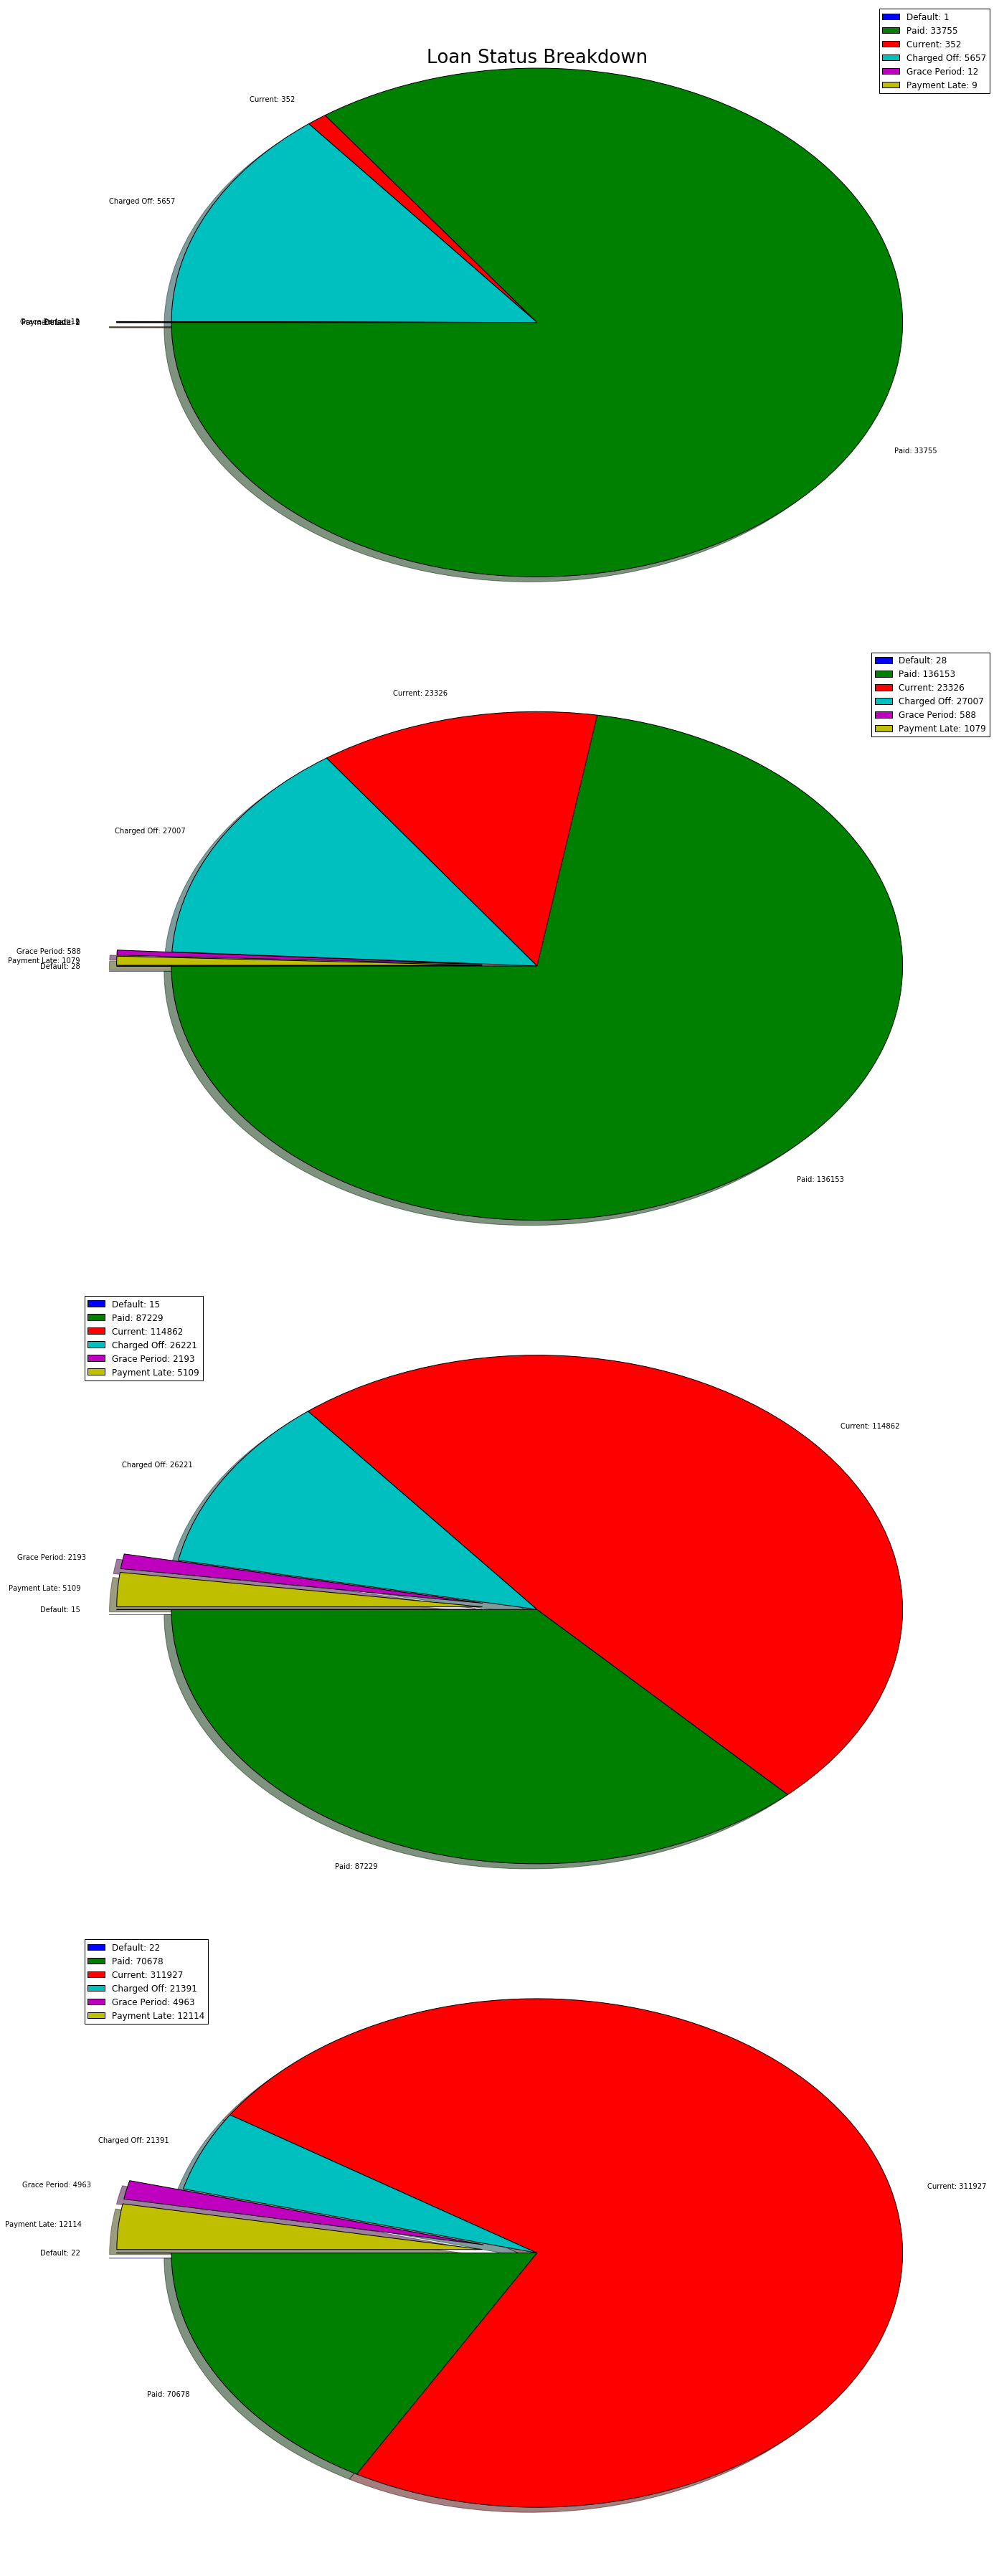

In [158]:
def pie_plot_loans(data, ax, titl):

    default = data[data['loan_status'] == 'Default'].shape[0]
    paid = data[data['loan_status'] == 'Fully Paid'].shape[0]
    current = data[data['loan_status'] == 'Current'].shape[0]
    charged_off = data[data['loan_status'] == 'Charged Off'].shape[0]
    grace_period = data[data['loan_status'] == 'In Grace Period'].shape[0]
    late = data[data['loan_status'] == 'Late (16-30 days)'].shape[0] + data[data['loan_status'] == 'Late (31-120 days)'].shape[0]
    
    ax.pie([default, paid, current, charged_off, grace_period, late], 
        labels=['Default: ' + str(default), 'Paid: ' + str(paid), 'Current: ' + str(current), 
                'Charged Off: ' + str(charged_off), 'Grace Period: ' + str(grace_period), 
                'Payment Late: ' + str(late)], shadow=True, startangle=180,
                explode=(.15, 0, 0, 0, 0.15, 0.15))
    
    ax.legend(loc = 'best')

    
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(18, 50))

plt.suptitle('Loan Status Breakdown' , fontsize=26)

ax1 = pie_plot_loans(data_2007_2011, ax1, '2007-2011')
ax2 = pie_plot_loans(data_2014, ax2, '2014')
ax3 = pie_plot_loans(data_2015, ax3, '2015')
ax4 = pie_plot_loans(data, ax4, '2016')

plt.tight_layout()
plt.show()


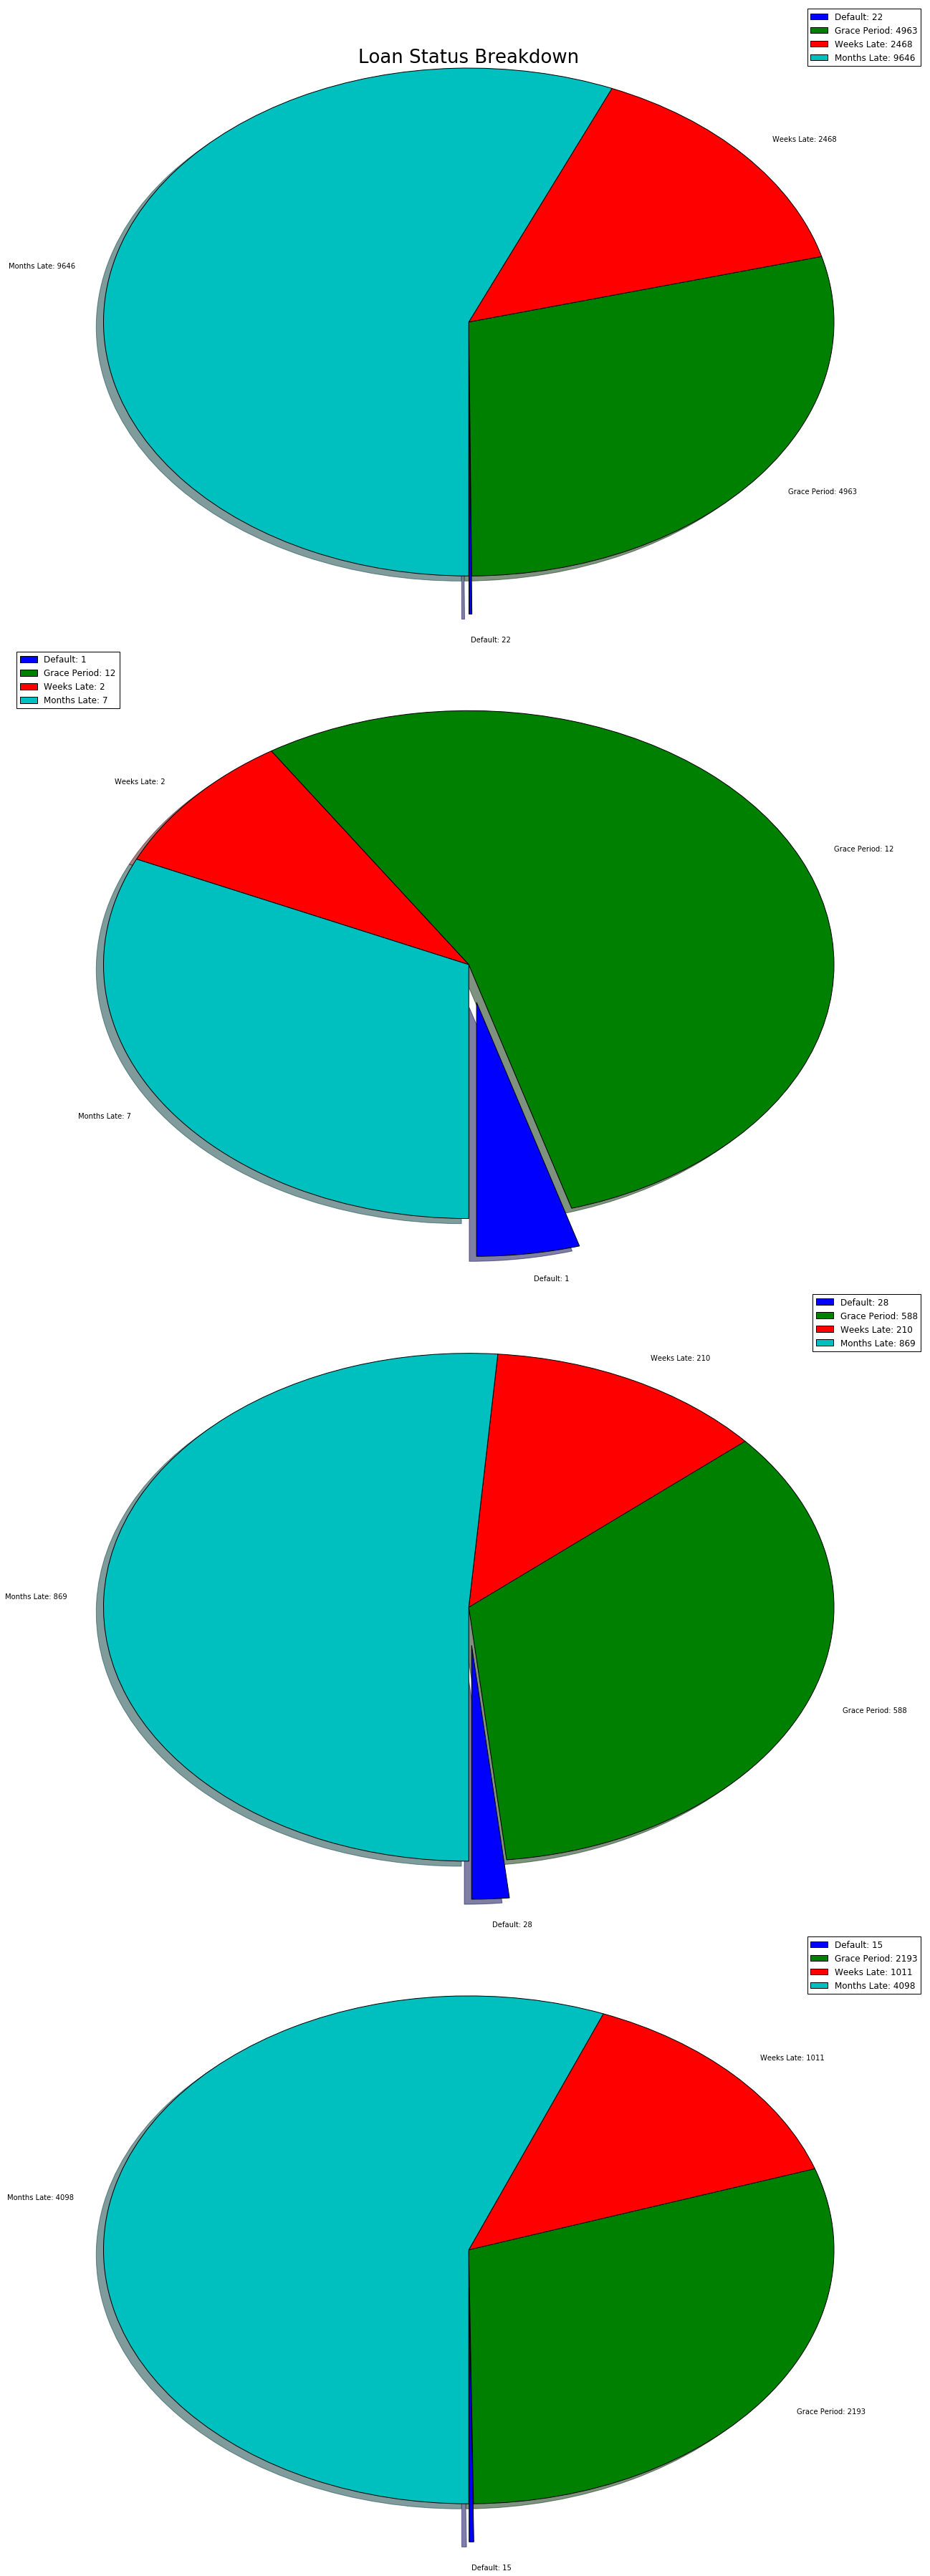

In [114]:
def pie_plot_poor_status(data, ax, titl):

    default = data[data['loan_status'] == 'Default'].shape[0]
    grace_period = data[data['loan_status'] == 'In Grace Period'].shape[0]
    weeks_late = data[data['loan_status'] == 'Late (16-30 days)'].shape[0] 
    months_late = data[data['loan_status'] == 'Late (31-120 days)'].shape[0]
    
    ax.pie([default, grace_period, weeks_late, months_late], 
        labels=['Default: ' + str(default), 
                'Grace Period: ' + str(grace_period), 
                'Weeks Late: ' + str(weeks_late), 'Months Late: ' + str(months_late)], shadow=True, startangle=270,
                explode=(.15, 0, 0, 0))
    
    ax.legend(loc = 'best')

    
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(18, 50))

plt.suptitle('Loan Status Breakdown' , fontsize=26)

ax1 = pie_plot_poor_status(data, ax1, '2007-2011')
ax2 = pie_plot_poor_status(data_2007_2011, ax2, '2014')
ax3 = pie_plot_poor_status(data_2014, ax3, '2015')
ax4 = pie_plot_poor_status(data_2015, ax4, '2016')

plt.tight_layout()
plt.show()


**<font size=6>Income</font>**

In [115]:
def plt_hist(x, x_min, x_max, log_trans, n_bins, title, ax, y_label, x_label, color):
    if log_trans:
        x = np.log10(x)
        x_min = np.log10(x_min)
        x_max = np.log10(x_max)

    color_arr = ['c', 'skyblue', 'm', 'g']
    x_plt = x[(x >= x_min) & (x <= x_max)]
    ax.hist(x_plt, bins=n_bins, color=color_arr[color])
    ax.set_xlim([x_min, x_max])
    ax.set_title(title, fontsize = 24)
    ax.set_xlabel(x_label, fontsize = 16)
    ax.set_ylabel(y_label, fontsize = 16)  
    ax.axvline(x.median(), color='r', linestyle='dashed', linewidth=4)

    # Remove the plot frame lines. They are unnecessary chartjunk.  
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  

    # Ensure that the axis ticks only show up on the bottom and left of the plot.  
    # Ticks on the right and top of the plot are generally unnecessary chartjunk.  
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()  

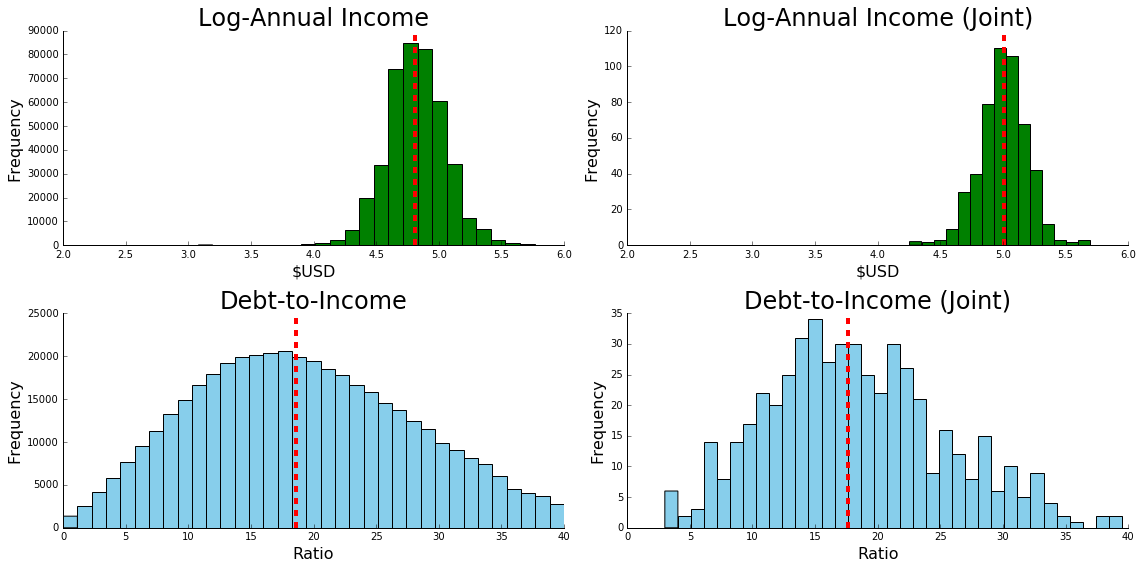

In [116]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
plt_hist(data.annual_inc, 100, 1000000, True, 25, "Log-Annual Income", ax[0][0], "Frequency", "$USD", 3)
plt_hist(data.annual_inc_joint, 100, 1000000, True, 15, "Log-Annual Income (Joint)", ax[0][1], "Frequency", "$USD", 3)
plt_hist(data.dti, 0, 40, False, 35, "Debt-to-Income", ax[1][0], "Frequency", "Ratio", 1)
plt_hist(data.dti_joint, 0, 40, False, 35, "Debt-to-Income (Joint)", ax[1][1], "Frequency", "Ratio", 1)
plt.tight_layout()
plt.show()

**<font size=6>Loan Terms</font>**

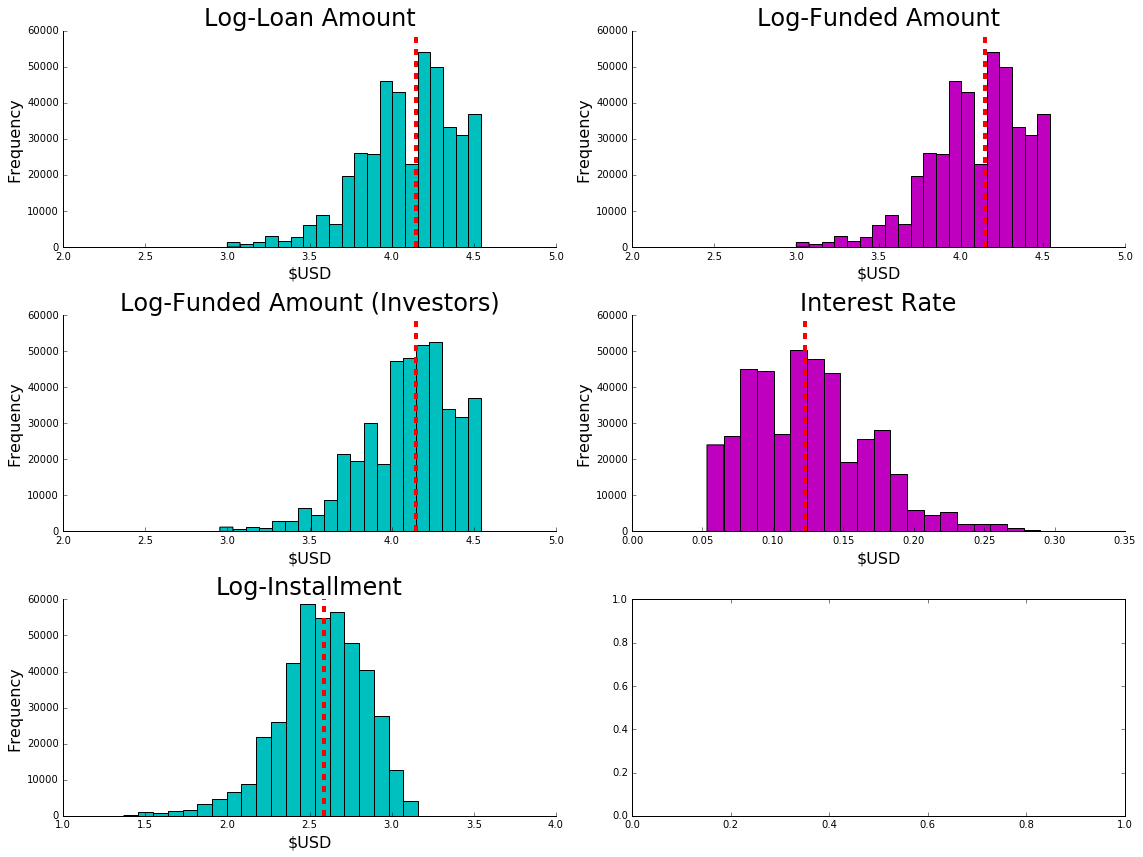

In [28]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
plt_hist(data.loan_amnt, 100, 100000, True, 20, "Log-Loan Amount", ax[0][0], "Frequency", "$USD", 0)
plt_hist(data.funded_amnt, 100, 100000, True, 20, "Log-Funded Amount", ax[0][1], "Frequency", "$USD", 2)
plt_hist(data.funded_amnt_inv, 100, 100000, True, 20, "Log-Funded Amount (Investors)", ax[1][0], "Frequency", "$USD", 0)
plt_hist(data.int_rate, 0, 0.35, False, 20, "Interest Rate", ax[1][1], "Frequency", "$USD", 2)
plt_hist(data.installment, 10, 10000, True, 20, "Log-Installment", ax[2][0], "Frequency", "$USD", 0)
plt.tight_layout()
plt.show()

**<font size=6>Repayments/Recoveries</font>**

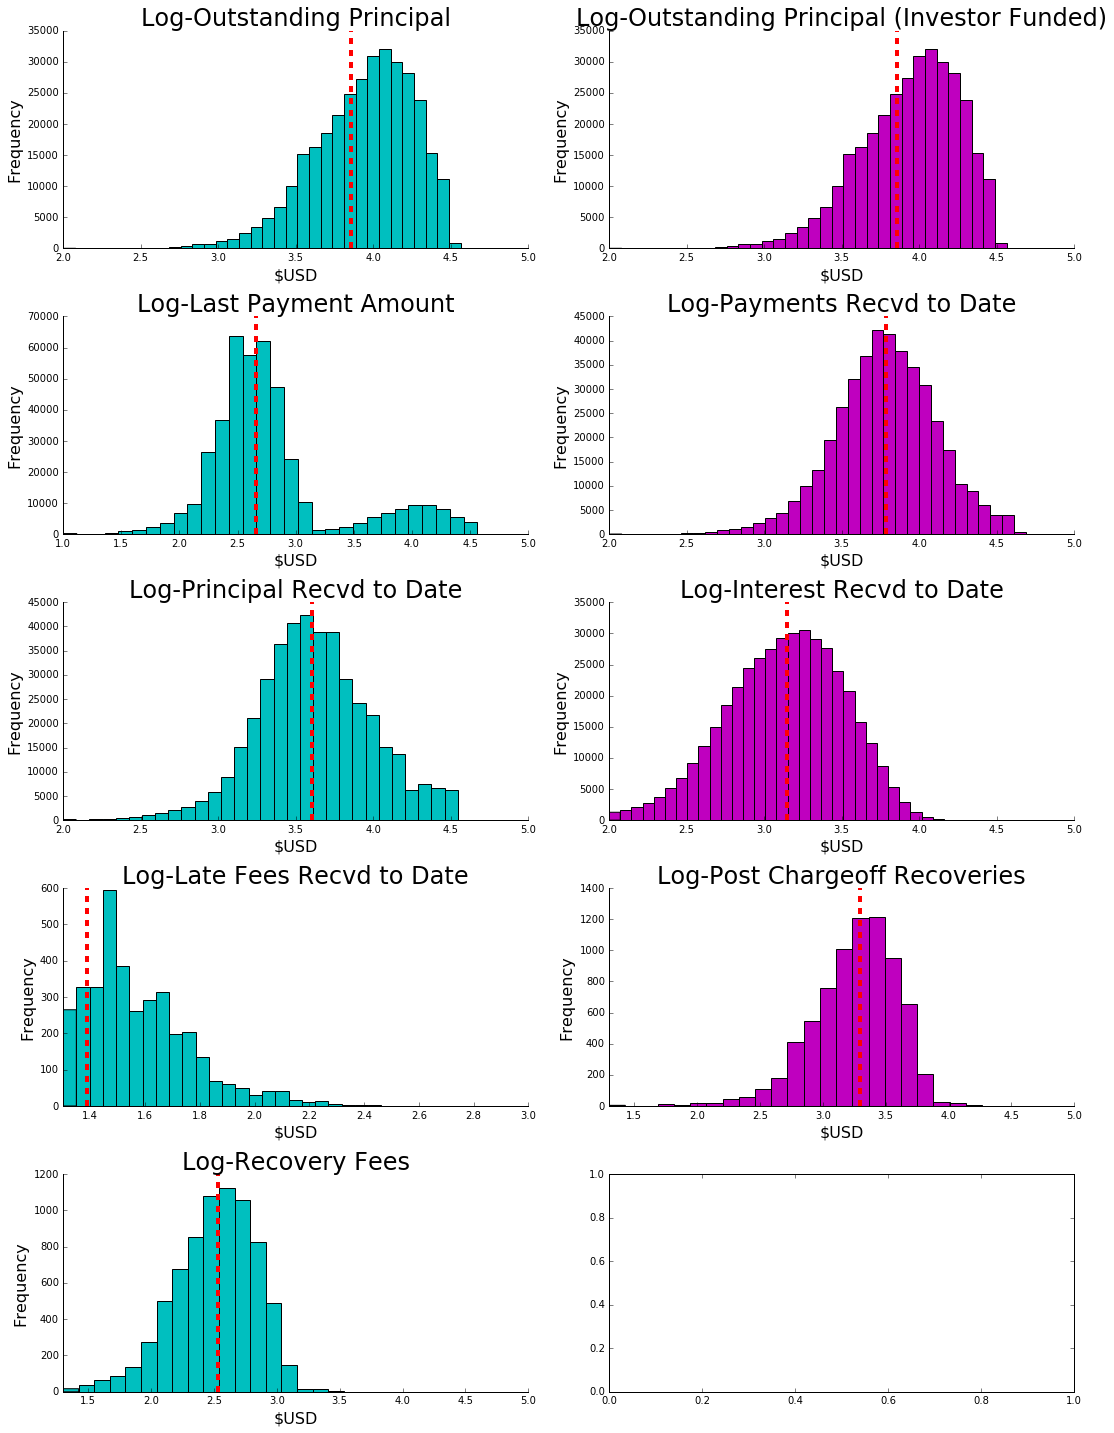

In [29]:
fig, ax = plt.subplots(5, 2, figsize=(16, 20))
plt_hist(data.out_prncp, 100, 100000, True, 35, "Log-Outstanding Principal", ax[0][0], "Frequency", "$USD", 0)
plt_hist(data.out_prncp_inv, 100, 100000, True, 35, "Log-Outstanding Principal (Investor Funded)", ax[0][1], "Frequency", "$USD", 2)
plt_hist(data.last_pymnt_amnt, 10, 100000, True, 30, "Log-Last Payment Amount", ax[1][0], "Frequency", "$USD", 0)
plt_hist(data.total_pymnt, 100, 100000, True, 35, "Log-Payments Recvd to Date", ax[1][1], "Frequency", "$USD", 2)
plt_hist(data.total_rec_prncp, 100, 100000, True, 30, "Log-Principal Recvd to Date", ax[2][0], "Frequency", "$USD", 0)
plt_hist(data.total_rec_int, 100, 100000, True, 30, "Log-Interest Recvd to Date", ax[2][1], "Frequency", "$USD", 2)
plt_hist(data.total_rec_late_fee[data.total_rec_late_fee>0], 20, 1000, True, 25, "Log-Late Fees Recvd to Date", ax[3][0], "Frequency", "$USD", 0)
plt_hist(data.recoveries[data.recoveries>0], 20, 100000, True, 25, "Log-Post Chargeoff Recoveries", ax[3][1], "Frequency", "$USD", 2)
plt_hist(data.collection_recovery_fee[data.collection_recovery_fee>0], 20, 100000, True, 20, "Log-Recovery Fees", ax[4][0], "Frequency", "$USD", 0)
plt.tight_layout()
plt.show()

**<font size=6>Credit Balances</font>**

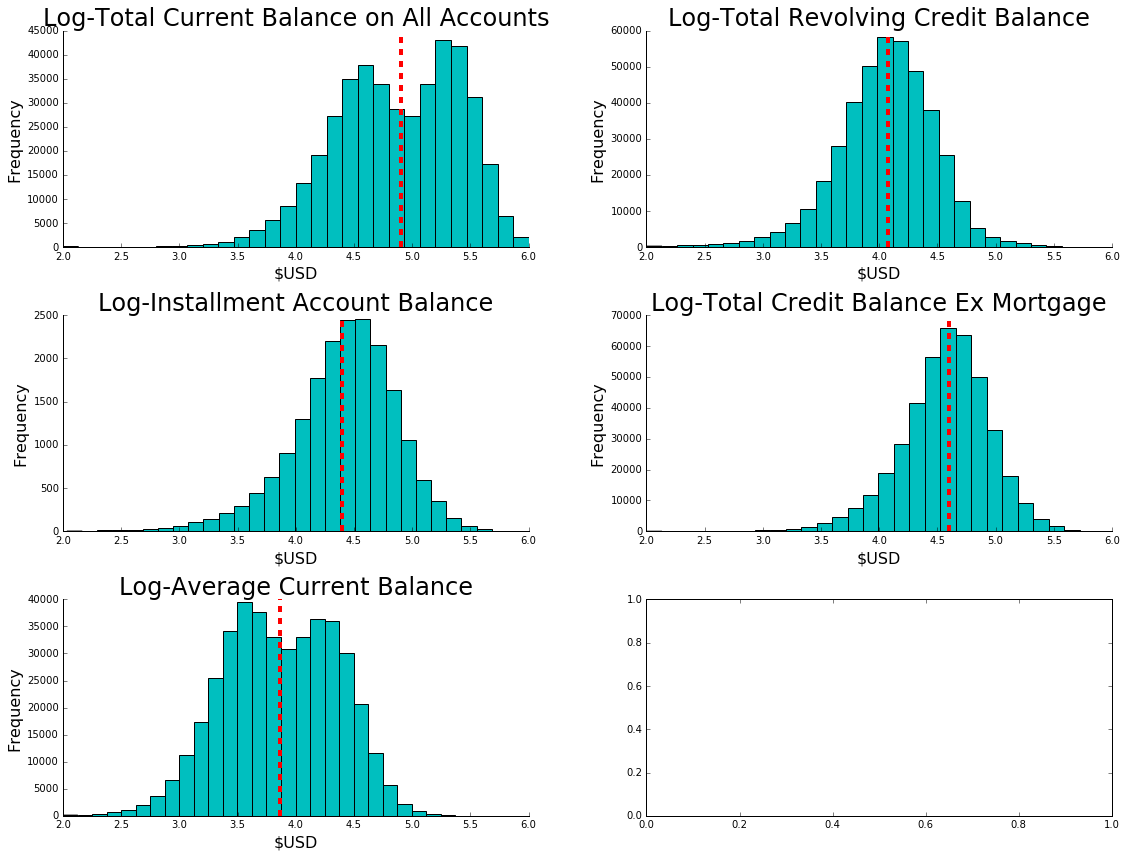

In [30]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
plt_hist(data.tot_cur_bal, 100, 1000000, True, 30, "Log-Total Current Balance on All Accounts", ax[0][0], "Frequency", "$USD", 0)
plt_hist(data.revol_bal, 100, 1000000, True, 30, "Log-Total Revolving Credit Balance", ax[0][1], "Frequency", "$USD", 0)
plt_hist(data.total_bal_il, 100, 1000000, True, 30, "Log-Installment Account Balance", ax[1][0], "Frequency", "$USD", 0)
plt_hist(data.total_bal_ex_mort, 100, 1000000, True, 30, "Log-Total Credit Balance Ex Mortgage", ax[1][1], "Frequency", "$USD", 0)
plt_hist(data.avg_cur_bal, 100, 1000000, True, 30, "Log-Average Current Balance", ax[2][0], "Frequency", "$USD", 0)
plt.tight_layout()
plt.show()

**<font size=6>Credit Limits</font>**

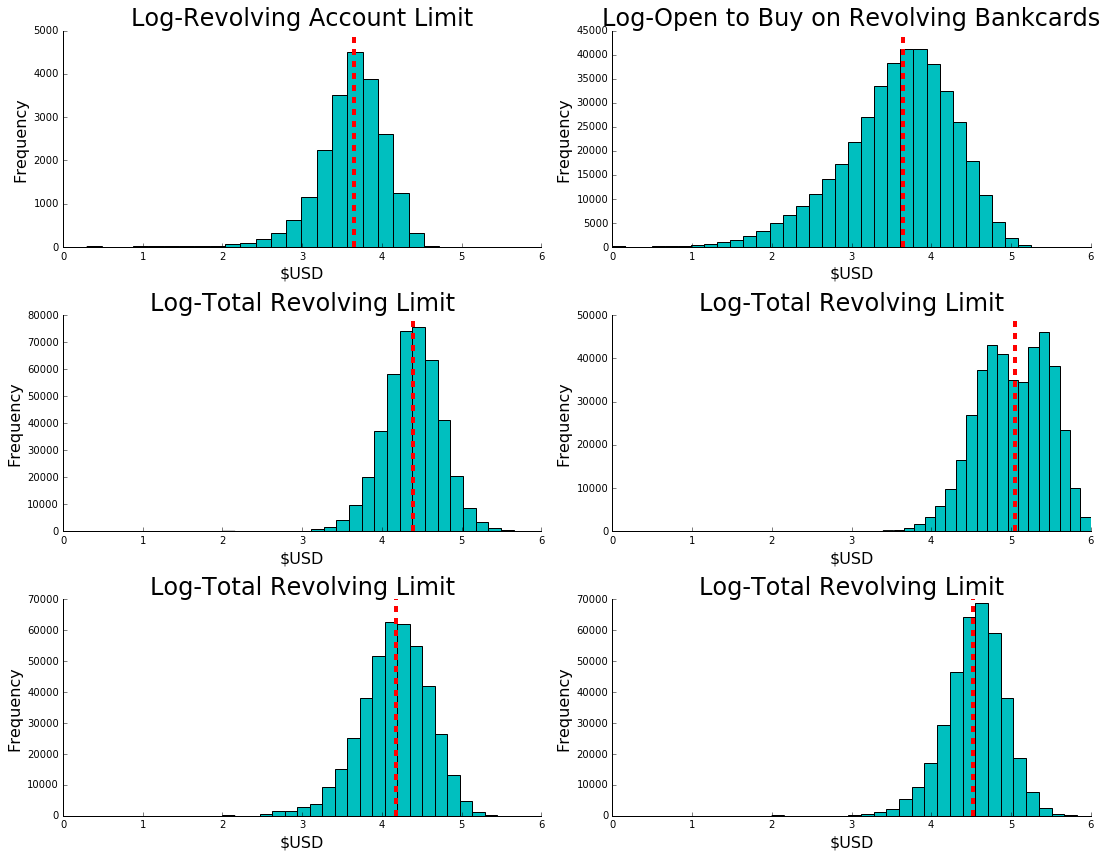

In [31]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
plt_hist(data.max_bal_bc, 1, 1000000, True, 25, "Log-Revolving Account Limit", ax[0][0], "Frequency", "$USD", 0)
plt_hist(data.bc_open_to_buy, 1, 1000000, True, 35, "Log-Open to Buy on Revolving Bankcards", ax[0][1], "Frequency", "$USD", 0)
plt_hist(data.total_rev_hi_lim, 1, 1000000, True, 25, "Log-Total Revolving Limit", ax[1][0], "Frequency", "$USD", 0)
plt_hist(data.tot_hi_cred_lim, 1, 1000000, True, 20, "Log-Total Revolving Limit", ax[1][1], "Frequency", "$USD", 0)
plt_hist(data.total_bc_limit, 1, 1000000, True, 25, "Log-Total Revolving Limit", ax[2][0], "Frequency", "$USD", 0)
plt_hist(data.total_il_high_credit_limit, 1, 1000000, True, 25, "Log-Total Revolving Limit", ax[2][1], "Frequency", "$USD", 0)
plt.tight_layout()
plt.show()

**<font size=6>Credit Utilization</font>**

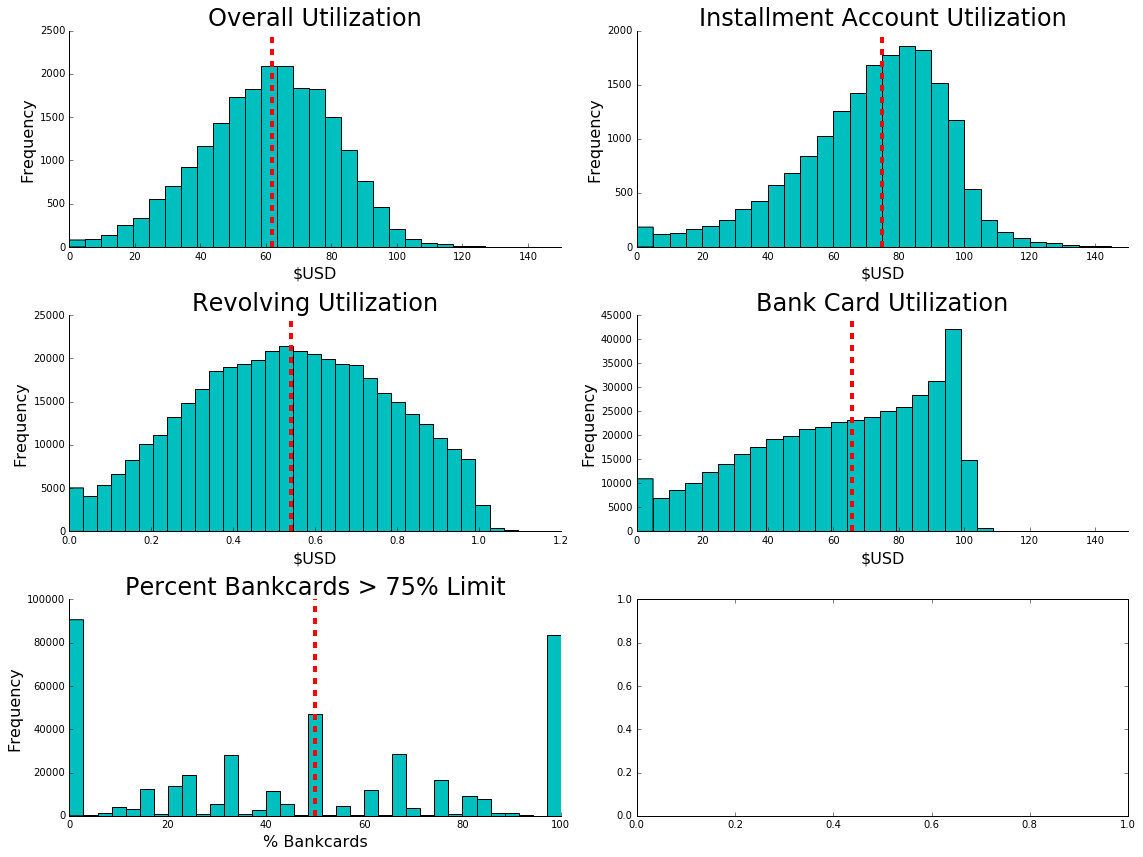

In [32]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
plt_hist(data.all_util, 0, 150, False, 30, "Overall Utilization", ax[0][0], "Frequency", "$USD", 0)
plt_hist(data.il_util, 0, 150, False, 30, "Installment Account Utilization", ax[0][1], "Frequency", "$USD", 0)
plt_hist(data.revol_util, 0, 1.2, False, 35, "Revolving Utilization", ax[1][0], "Frequency", "$USD", 0)
plt_hist(data.bc_util, 0, 150, False, 30, "Bank Card Utilization", ax[1][1], "Frequency", "$USD", 0)
plt_hist(data.percent_bc_gt_75, 0, 100, False, 35, "Percent Bankcards > 75% Limit", ax[2][0], "Frequency", "% Bankcards", 0)
plt.tight_layout()
plt.show()

**<font size=6>Number of Accounts</font>**

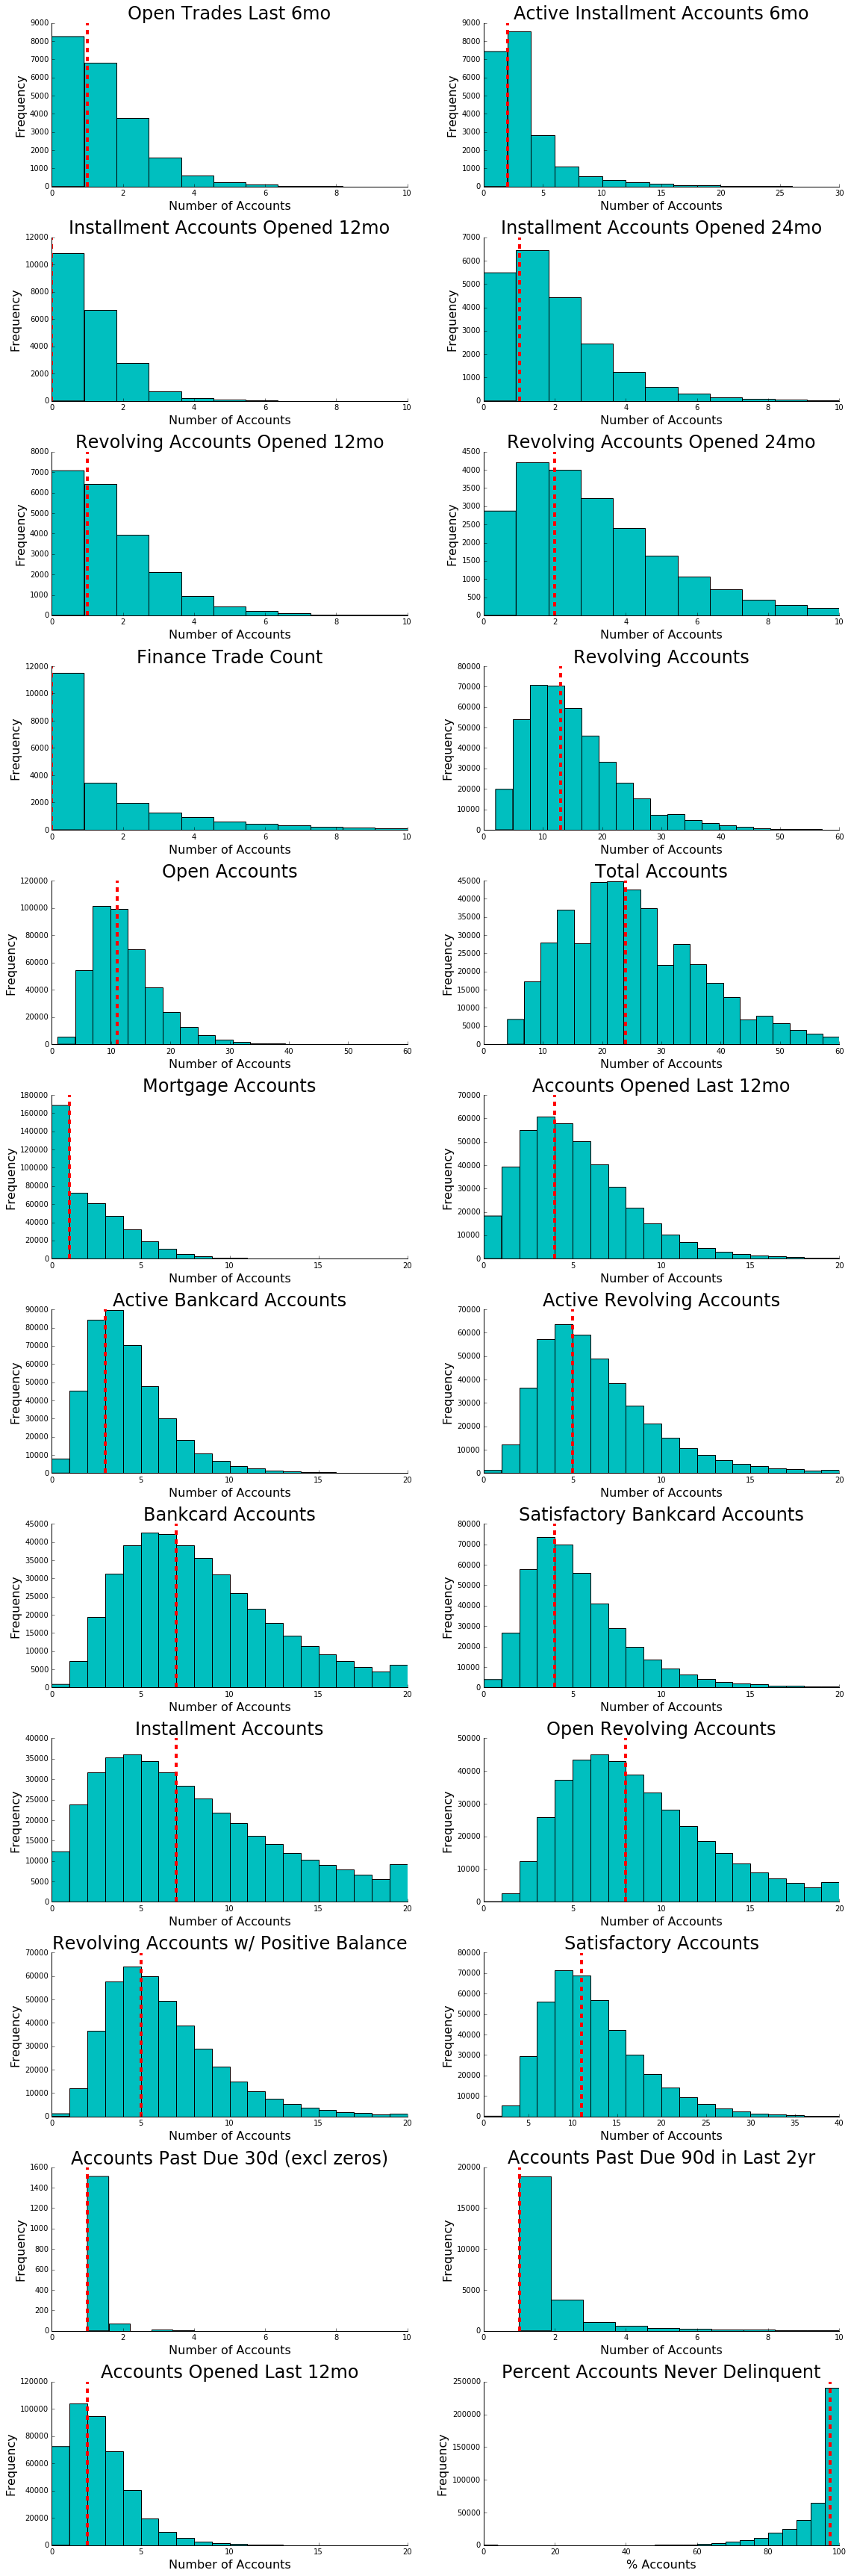

In [33]:
fig, ax = plt.subplots(12, 2, figsize=(16, 48))
plt_hist(data.open_acc_6m, 0, 10, False, 11, "Open Trades Last 6mo", ax[0, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.open_il_6m, 0, 30, False, 15, "Active Installment Accounts 6mo", ax[0, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.open_il_12m, 0, 10, False, 11, "Installment Accounts Opened 12mo", ax[1, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.open_il_24m, 0, 10, False, 11, "Installment Accounts Opened 24mo", ax[1, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.open_rv_12m, 0, 10, False, 11, "Revolving Accounts Opened 12mo", ax[2, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.open_rv_24m, 0, 10, False, 11, "Revolving Accounts Opened 24mo", ax[2, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.total_cu_tl, 0, 10, False, 11, "Finance Trade Count", ax[3, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_rev_accts, 0, 60, False, 20, "Revolving Accounts", ax[3, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.open_acc, 0, 60, False, 20, "Open Accounts", ax[4, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.total_acc, 0, 60, False, 20, "Total Accounts", ax[4, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.mort_acc, 0, 20, False, 20, "Mortgage Accounts", ax[5, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.acc_open_past_24mths, 0, 20, False, 20, "Accounts Opened Last 12mo", ax[5, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_actv_bc_tl, 0, 20, False, 20, "Active Bankcard Accounts", ax[6, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_actv_rev_tl, 0, 20, False, 20, "Active Revolving Accounts", ax[6, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_bc_tl, 0, 20, False, 20, "Bankcard Accounts", ax[7, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_bc_sats, 0, 20, False, 20, "Satisfactory Bankcard Accounts", ax[7, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_il_tl, 0, 20, False, 20, "Installment Accounts", ax[8, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_op_rev_tl, 0, 20, False, 20, "Open Revolving Accounts", ax[8, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_rev_tl_bal_gt_0, 0, 20, False, 20, "Revolving Accounts w/ Positive Balance", ax[9, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_sats, 0, 40, False, 20, "Satisfactory Accounts", ax[9, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_tl_30dpd[data.num_tl_30dpd>0], 0, 10, False, 5, "Accounts Past Due 30d (excl zeros)", ax[10, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_tl_90g_dpd_24m[data.num_tl_90g_dpd_24m>0], 0, 10, False, 10, "Accounts Past Due 90d in Last 2yr", ax[10, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_tl_op_past_12m, 0, 20, False, 20, "Accounts Opened Last 12mo", ax[11, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.pct_tl_nvr_dlq, 0, 100, False, 25, "Percent Accounts Never Delinquent", ax[11, 1], "Frequency", "% Accounts", 0)
plt.tight_layout()
plt.show()

**<font size=6>Derogatory Marks</font>**

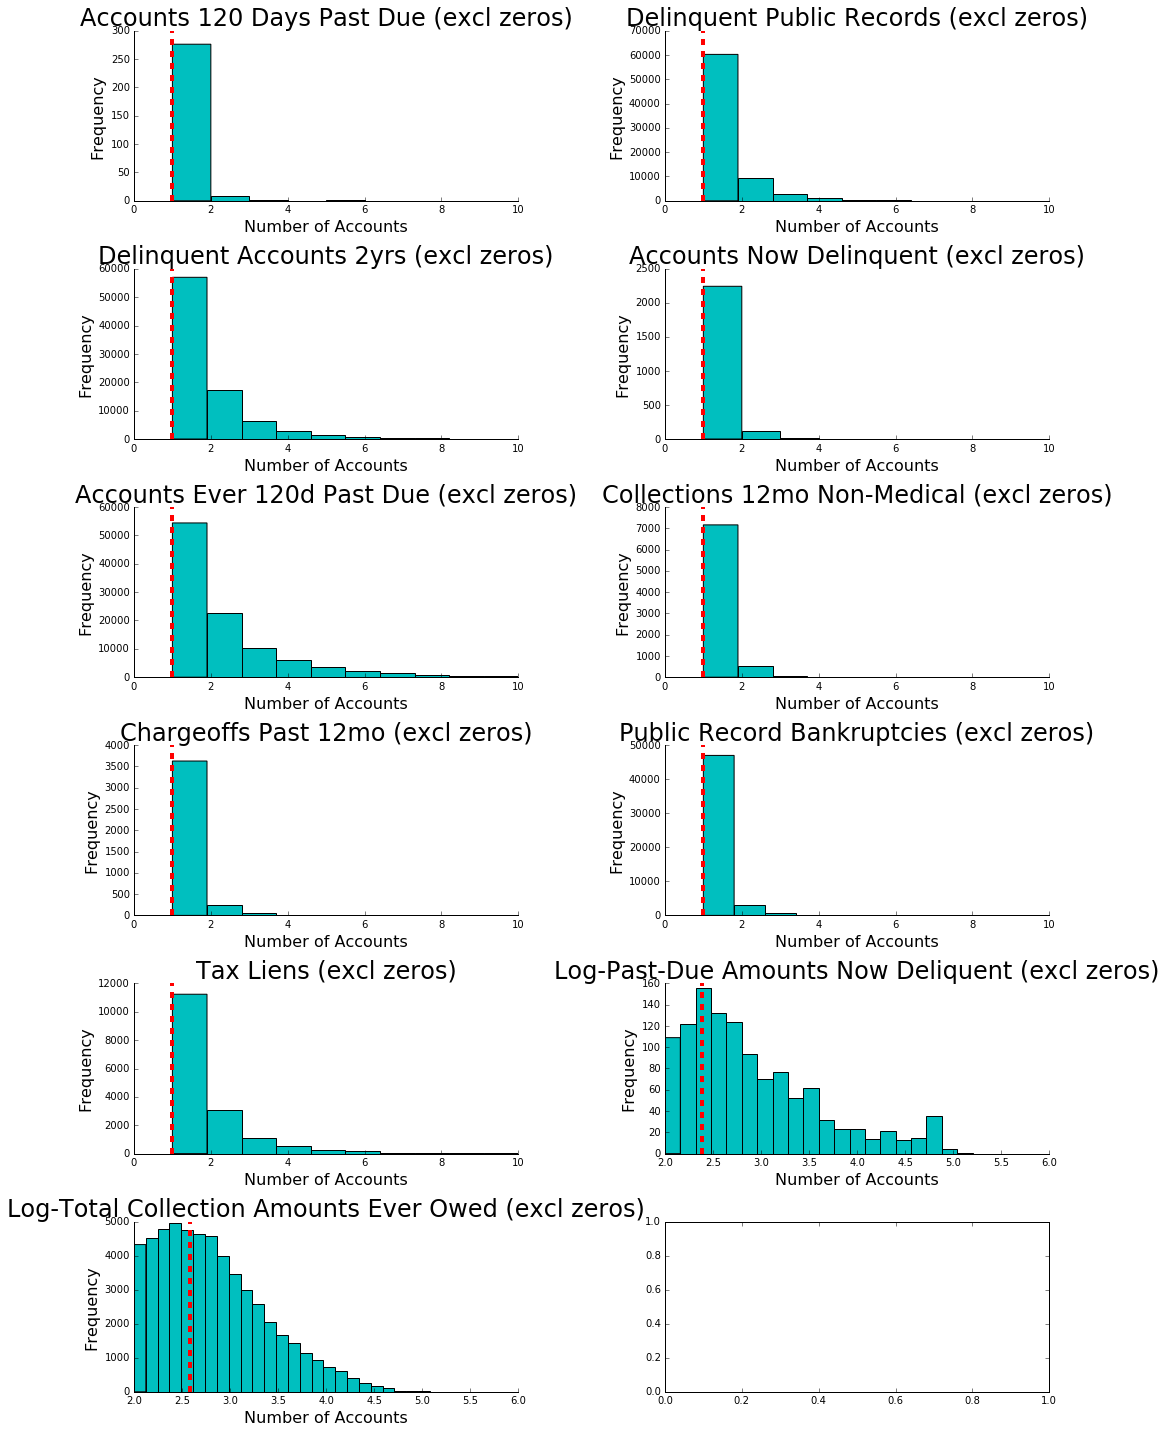

In [34]:
fig, ax = plt.subplots(6, 2, figsize=(16, 20))
plt_hist(data.num_tl_120dpd_2m[data.num_tl_120dpd_2m>0], 0, 10, False, 5, "Accounts 120 Days Past Due (excl zeros)", ax[0][0], "Frequency", "Number of Accounts", 0)
plt_hist(data.pub_rec[data.pub_rec>0], 0, 10, False, 10, "Delinquent Public Records (excl zeros)", ax[0][1], "Frequency", "Number of Accounts", 0)
plt_hist(data.delinq_2yrs[data.delinq_2yrs>0], 0, 10, False, 10, "Delinquent Accounts 2yrs (excl zeros)", ax[1][0], "Frequency", "Number of Accounts", 0)
plt_hist(data.acc_now_delinq[data.acc_now_delinq>0], 0, 10, False, 5, "Accounts Now Delinquent (excl zeros)", ax[1][1], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_accts_ever_120_pd[data.num_accts_ever_120_pd>0], 0, 10, False, 10, "Accounts Ever 120d Past Due (excl zeros)", ax[2][0], "Frequency", "Number of Accounts", 0)
plt_hist(data.collections_12_mths_ex_med[data.collections_12_mths_ex_med>0], 0, 10, False, 10, "Collections 12mo Non-Medical (excl zeros)", ax[2][1], "Frequency", "Number of Accounts", 0)
plt_hist(data.chargeoff_within_12_mths[data.chargeoff_within_12_mths>0], 0, 10, False, 10, "Chargeoffs Past 12mo (excl zeros)", ax[3][0], "Frequency", "Number of Accounts", 0)
plt_hist(data.pub_rec_bankruptcies[data.pub_rec_bankruptcies>0], 0, 10, False, 10, "Public Record Bankruptcies (excl zeros)", ax[3][1], "Frequency", "Number of Accounts", 0)
plt_hist(data.tax_liens[data.tax_liens>0], 0, 10, False, 10, "Tax Liens (excl zeros)", ax[4][0], "Frequency", "Number of Accounts", 0)
plt_hist(data.delinq_amnt[data.delinq_amnt>0], 100, 1000000, True, 20, "Log-Past-Due Amounts Now Deliquent (excl zeros)", ax[4][1], "Frequency", "Number of Accounts", 0)
plt_hist(data.tot_coll_amt[data.tot_coll_amt>0], 100, 1000000, True, 30, "Log-Total Collection Amounts Ever Owed (excl zeros)", ax[5][0], "Frequency", "Number of Accounts", 0)
plt.tight_layout()
plt.show()

**<font size=6>Credit Inquiries</font>**

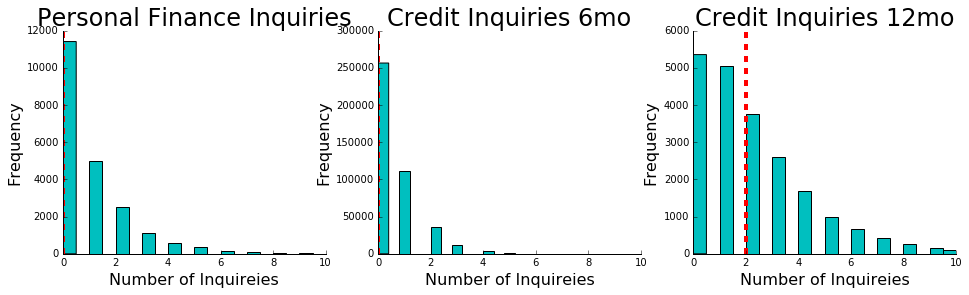

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
plt_hist(data.inq_fi, 0, 10, False, 20, "Personal Finance Inquiries", ax[0], "Frequency", "Number of Inquireies", 0)
plt_hist(data.inq_last_6mths, 0, 10, False, 15, "Credit Inquiries 6mo", ax[1], "Frequency", "Number of Inquireies", 0)
plt_hist(data.inq_last_12m, 0, 10, False, 20, "Credit Inquiries 12mo", ax[2], "Frequency", "Number of Inquireies", 0)
plt.show()

**<font size=6>Months Since</font>**

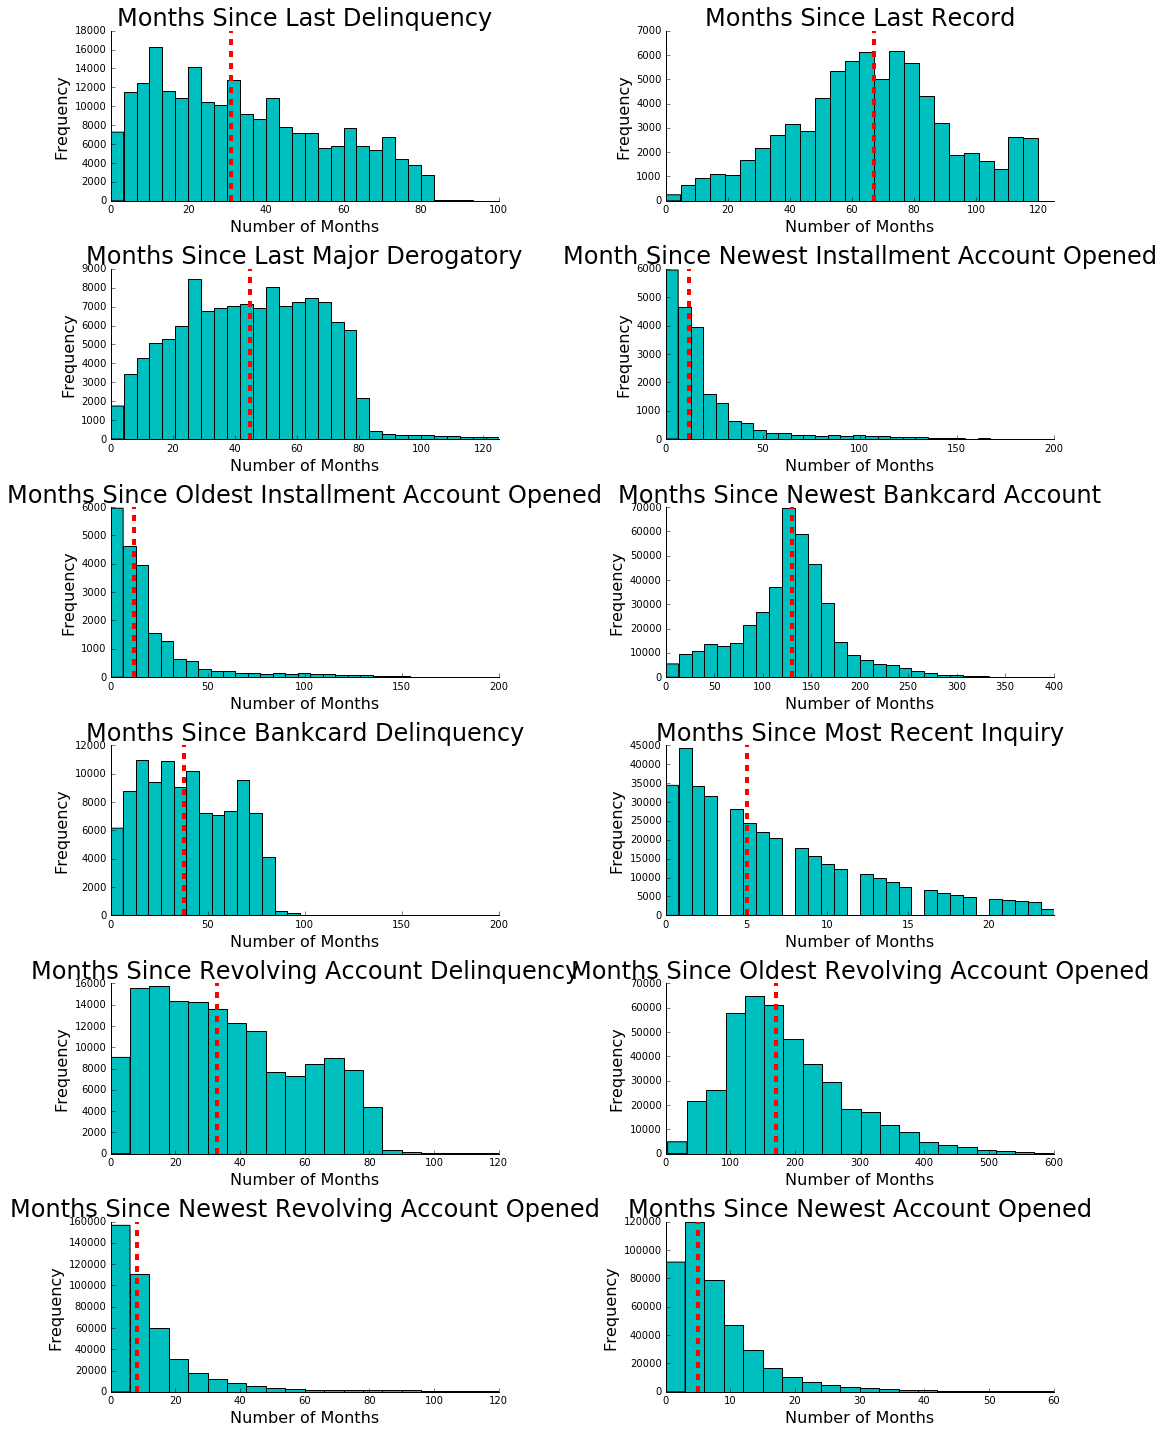

In [36]:
fig, ax = plt.subplots(6, 2, figsize=(16, 20))
plt_hist(data.mths_since_last_delinq, 0, 100, False, 30, "Months Since Last Delinquency", ax[0][0], "Frequency", "Number of Months", 0)
plt_hist(data.mths_since_last_record, 0, 125, False, 25, "Months Since Last Record", ax[0][1], "Frequency", "Number of Months", 0)
plt_hist(data.mths_since_last_major_derog, 0, 125, False, 30, "Months Since Last Major Derogatory", ax[1][0], "Frequency", "Number of Months", 0)
plt_hist(data.mths_since_rcnt_il, 0, 200, False, 30, "Month Since Newest Installment Account Opened", ax[1][1], "Frequency", "Number of Months", 0)
plt_hist(data.mths_since_rcnt_il, 0, 200, False, 30, "Months Since Oldest Installment Account Opened", ax[2][0], "Frequency", "Number of Months", 0)
plt_hist(data.mo_sin_old_il_acct, 0, 400, False, 30, "Months Since Newest Bankcard Account", ax[2][1], "Frequency", "Number of Months", 0)
plt_hist(data.mths_since_recent_bc_dlq, 0, 200, False, 30, "Months Since Bankcard Delinquency", ax[3][0], "Frequency", "Number of Months", 0)
plt_hist(data.mths_since_recent_inq, 0, 24, False, 30, "Months Since Most Recent Inquiry", ax[3][1], "Frequency", "Number of Months", 0)
plt_hist(data.mths_since_recent_revol_delinq, 0, 120, False, 20, "Months Since Revolving Account Delinquency", ax[4][0], "Frequency", "Number of Months", 0)
plt_hist(data.mo_sin_old_rev_tl_op, 0, 600, False, 20, "Months Since Oldest Revolving Account Opened", ax[4][1], "Frequency", "Number of Months", 0)
plt_hist(data.mo_sin_rcnt_rev_tl_op, 0, 120, False, 20, "Months Since Newest Revolving Account Opened", ax[5][0], "Frequency", "Number of Months", 0)
plt_hist(data.mo_sin_rcnt_tl, 0, 60, False, 20, "Months Since Newest Account Opened", ax[5][1], "Frequency", "Number of Months", 0)
plt.tight_layout()
plt.show()

**<font size=6>State Wise Distribution</font>**

In [41]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}
state_codes = dict ( (v,k) for k, v in us_state_abbrev.items() )

In [42]:
def normalize(d, target=1.0):
    x = np.array(d.values())
    where_are_NaNs = np.isnan(x)
    x[where_are_NaNs] = 0
    sort = np.argsort(x)
    sort = sort[x[sort] != 0]
    min = x[sort[0]]
    x = x-min
    raw = np.max(x)
    factor = float(target)/raw
    return {key:value*factor for key,value in d.iteritems()}

In [43]:
def plot_state_wise_data(var, title):
    
#     Showing colorbar is nightmare on axes , cant resolve it now.
    fig = plt.figure(figsize=(30,5)); 
    ax = fig.add_subplot(1,1,1); 

    var = normalize(var)
    # create the map
    map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

    # load the shapefile, use the name 'states'
    map.readshapefile('./shape/st99_d00', name='states', drawbounds=True)

    state_names = []
    for shape_dict in map.states_info:
        state_names.append(shape_dict['NAME'])

    Blues = plt.get_cmap('Reds')
    
    for idx, state in enumerate(state_names):
        name = state

        value = 0
        if (us_state_abbrev.has_key(name)):
            code = us_state_abbrev[name]
            if var.has_key(code):
                value = var[code]
#         print state + str(value) + "    -----------      " + str(Blues(value))
        seg = map.states[idx]
        col = np.array(Blues(value))
        poly = Polygon(seg, facecolor = col, edgecolor='none')
        cax = ax.add_patch(poly)
        
#     lons, lats = map.makegrid(0 , len(var))
#     xi, yi = map(lons, lats)
#     cs = map.pcolor(xi, yi, var)
#     ax.pcolor(var)
#     map.colorbar(cs)
#     plt.colorbar(cax)
    plt.title(title)
    plt.show()
    return ax


NameError: global name 'Basemap' is not defined

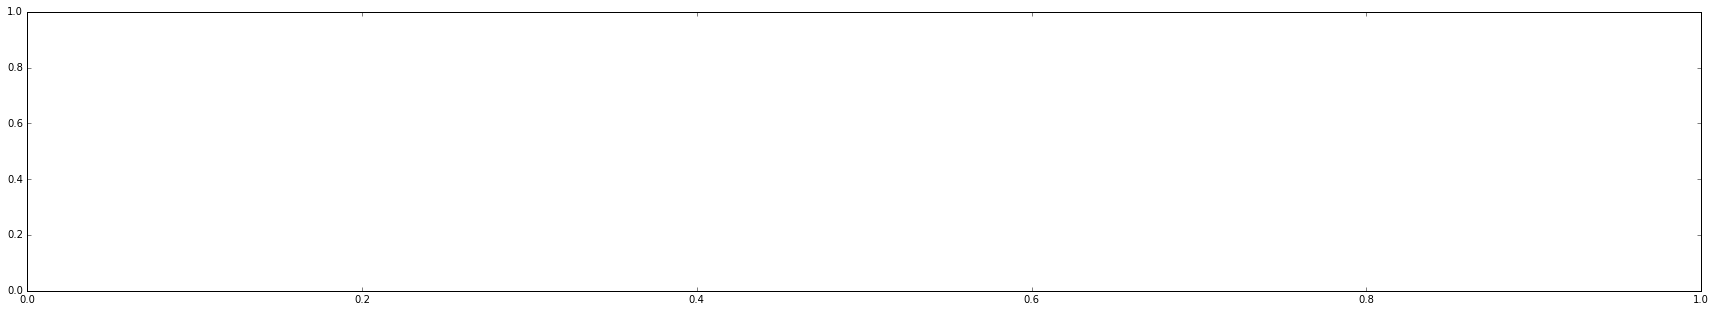

In [44]:
state_loan = data.groupby("addr_state").loan_amnt.sum().to_dict()
plot_state_wise_data(state_loan, "State wise loan distribution")

NameError: global name 'Basemap' is not defined

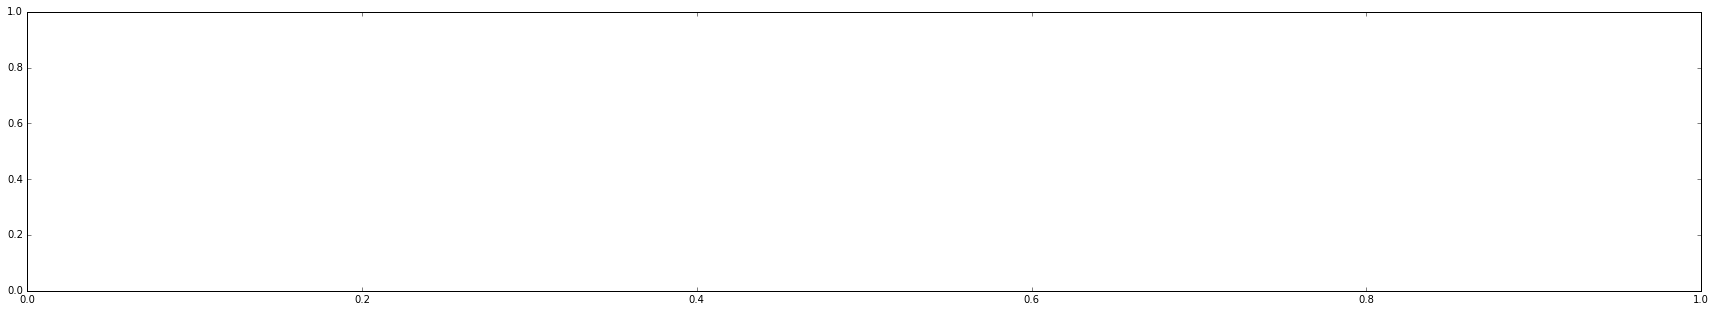

In [45]:
annual_inc_joint = data.groupby("addr_state").annual_inc_joint.sum().to_dict()
plot_state_wise_data(annual_inc_joint, "Annual income joint distribution")

NameError: global name 'Basemap' is not defined

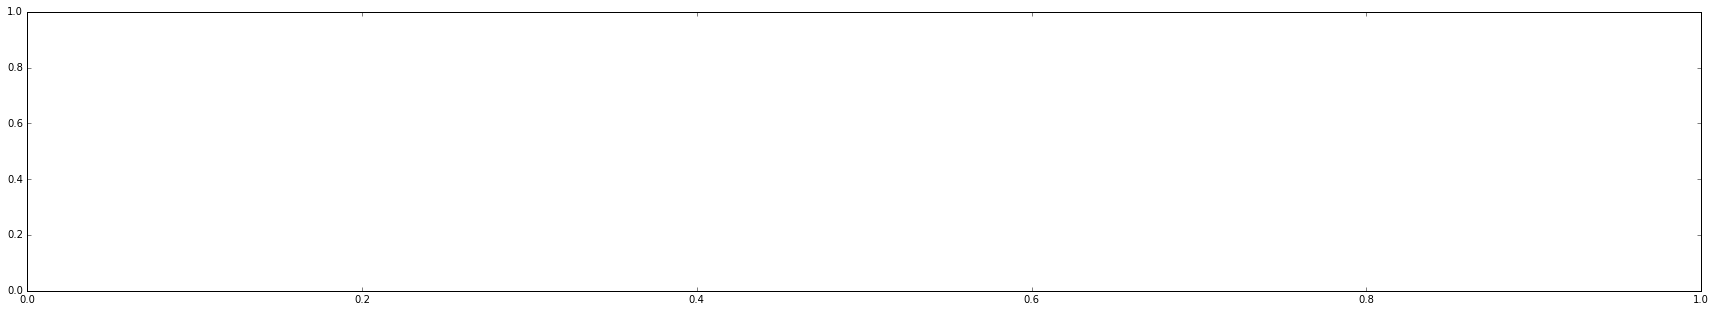

In [46]:
tot_cur_bal = data.groupby("addr_state").tot_cur_bal.sum().to_dict()
plot_state_wise_data(tot_cur_bal, "Total current balance distribution")

NameError: global name 'Basemap' is not defined

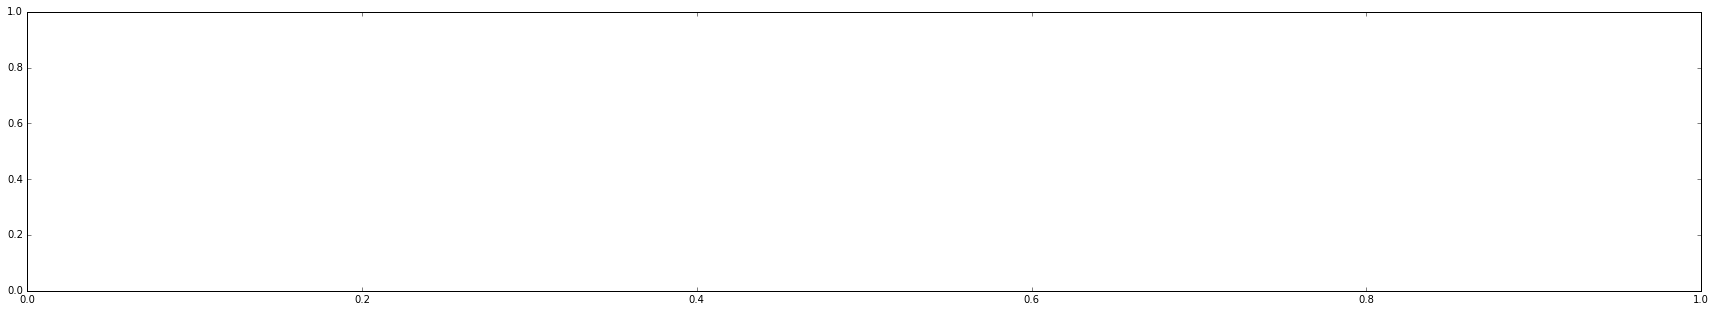

In [47]:
total_acc = data.groupby("addr_state").total_acc.sum().to_dict()
plot_state_wise_data(total_acc, "Open account distribution")

NameError: global name 'Basemap' is not defined

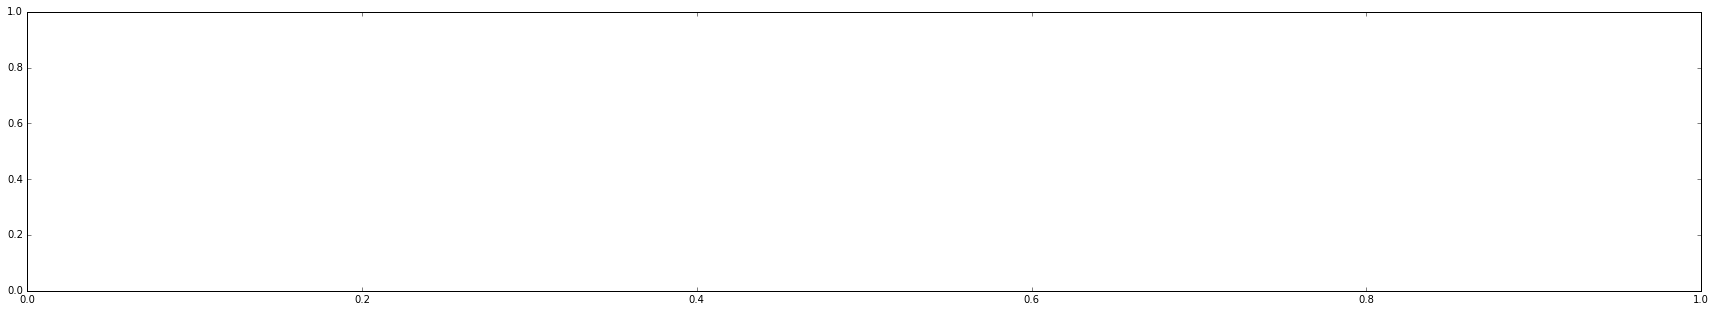

In [48]:
inq_fi = data.groupby("addr_state").inq_fi.sum().to_dict()
plot_state_wise_data(inq_fi, "Credit enquiries distribution")

NameError: global name 'Basemap' is not defined

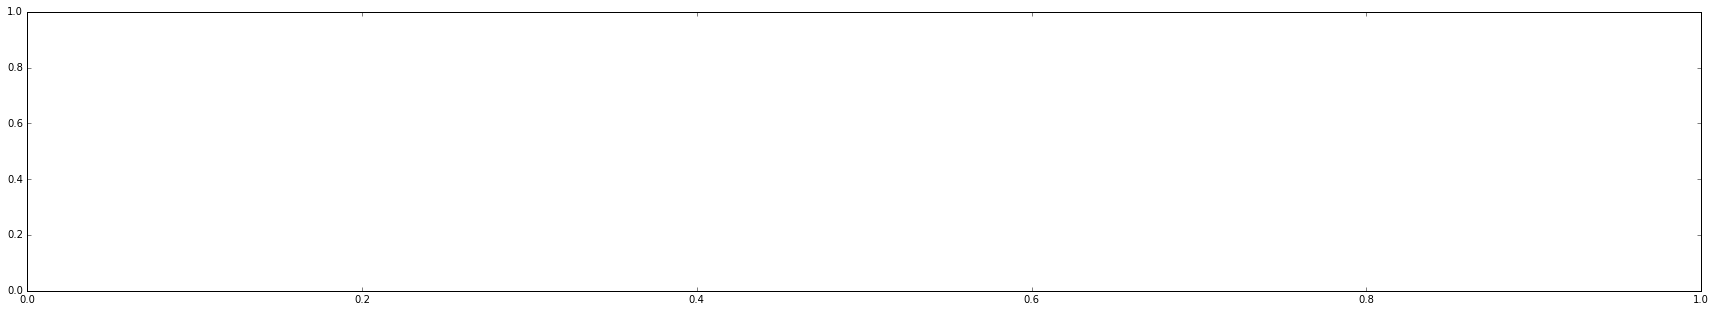

In [49]:
df = data[data.num_tl_120dpd_2m>0]
num_tl_120dpd = df.groupby("addr_state").num_tl_120dpd_2m.sum().to_dict()
plot_state_wise_data(num_tl_120dpd, "Accounts past due date - 120 days - excl zeros  distribution")

**<font size=6>Correlation Heatmaps</font>**

In [51]:
import seaborn as sns
corr_df = data.corr()
plt.figure(figsize=[18,15])
sns.heatmap(corr_df)

ImportError: No module named seaborn

In [52]:
df = corr_df.fillna(0)
g = sns.clustermap(df, figsize=(18,15))

NameError: name 'corr_df' is not defined

In [53]:
plt.figure(figsize=(20,6))
den = scipy.cluster.hierarchy.dendrogram(g.dendrogram_col.linkage,
                                         labels = df.index,
                                         color_threshold=2.3,
                                         leaf_font_size=12)

AttributeError: 'module' object has no attribute 'cluster'

In [54]:
import scipy.cluster.hierarchy as sch
ind = sch.fcluster(g.dendrogram_col.linkage, 2.3, 'distance')
corr_df["cluster"] = ind

NameError: name 'g' is not defined

In [ ]:
print corr_df["cluster"]

**<font size=6>Boxplots</font>**

In [55]:
import seaborn as sns
sns.boxplot(x="grade", y="loan_amnt", hue="term", data=data)
ax = plt.gca()
ax.set_title("Loan Amount by Grade / Loan Term", fontsize=24)
ax.set_xlabel("LendingTree Assigned Grade", fontsize = 16)
ax.set_ylabel("Loan Amount", fontsize = 16)  
sns.despine(offset=10, trim=True)

ImportError: No module named seaborn

In [56]:
def reject_outliers(df, col_name, m=2):
    """ Returns data frame without outliers in the col_name column """
    df_ = df[-np.isnan(df[col_name])]
    return df_[np.abs(df_[col_name] - df_[col_name].mean()) < m * df_[col_name].std()]

def boxplot_by_grade(ax, bp_title, y_col, y_label, reject_m=2):
    sns.boxplot(ax=ax, x="grade", y=y_col, data=reject_outliers(data, y_col, reject_m))
    sns.despine(offset=10, trim=True)
    ax.set_title(bp_title, fontsize=24)
    ax.set_xlabel("LendingTree Assigned Grade", fontsize = 16)
    ax.set_ylabel(y_label, fontsize = 16)  

    # Remove the plot frame lines. They are unnecessary chartjunk.  
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  

    # Ensure that the axis ticks only show up on the bottom and left of the plot.  
    # Ticks on the right and top of the plot are generally unnecessary chartjunk.  
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()  

NameError: global name 'sns' is not defined

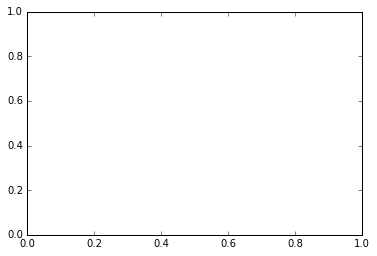

In [57]:
boxplot_by_grade(plt.gca(), bp_title="Open accounts boxplots by grade", y_col="open_acc", y_label="Number of Open Accounts")

NameError: global name 'sns' is not defined

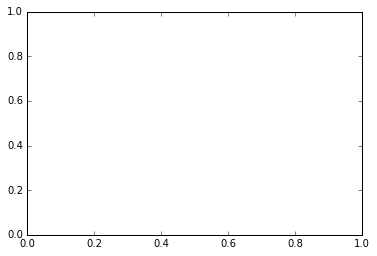

In [58]:
boxplot_by_grade(plt.gca(), bp_title="Debt-to-income boxplots by grade", y_col="dti", y_label="Debt-to-Income Ratio")

In [ ]:
boxplot_by_grade(plt.gca(), bp_title="Annual income boxplots by grade", y_col="annual_inc", y_label="Annual Income")

In [ ]:
boxplot_by_grade(plt.gca(), bp_title="Interest rate boxplots by grade", y_col="int_rate", y_label="Interest Rate Percent")

In [ ]:
boxplot_by_grade(plt.gca(), bp_title="Total current balance boxplots by grade", y_col="tot_cur_bal", y_label="Total Current Balance")

In [ ]:
boxplot_by_grade(plt.gca(), bp_title="Total revolving limit boxplots by grade", y_col="total_rev_hi_lim", y_label="Total Credit Limit on Revolving Accounts")

In [ ]:
boxplot_by_grade(plt.gca(), bp_title="Credit utilization boxplots by grade", y_col="all_util", y_label="Utilization Ratio on All Accounts")

In [ ]:
boxplot_by_grade(plt.gca(), bp_title="Months since old bank a/c by grade", y_col="mo_sin_old_il_acct", y_label="# Mo Since Oldest Bank A/c Opened")

**<font size=6>Scatterplots</font>**

Based on the condensed dendograms grouping of independent variables, we tested predictors from each group against one another to see if we could identify any clear groupings of loan statuses.

### Debt To Income Ratio vs. Length of Credit History

In [177]:
#print data.dti[data['loan_status'] == 'Default'].values
#print data.mo_sin_old_rev_tl_op[data['loan_status'] != 'Default'].values

def plot_scatter(data, x_lable, y_lable, groups, axes):
    #set up color map (one color per group number)
    
    datasets = [data_2014, data_2015, data]
    titles = ['2014', '2015', '2016']
    
    for i in range(len(datasets)):
        unique_values = pd.unique(datasets[i]['loan_status'])
        #split [0, 1] in to as many parts as there are groups
        group_numbers = np.linspace(0, 1,len(unique_values))
        #get a color map
        c_map = plt.get_cmap('rainbow') 
        #get a range of colors from color map
        c_norm  = colors.Normalize(vmin=0, vmax=group_numbers[-1])
        #get a map that maps a group number to a color
        number_map = cmx.ScalarMappable(norm=c_norm, cmap=c_map)

        #plot points colored by their group number
        for group, status in enumerate(unique_values):
            #convert a group number into a color using our map
            color = number_map.to_rgba(group_numbers[group])
            #make a scatter plot of a specific group colored by its group number color
            #print data.dti[data['loan_status'] == status].values.shape
            #print data.mo_sin_old_rev_tl_op[data['loan_status'] == status].values.shape
            axes[i].scatter(datasets[i].dti[datasets[i]['loan_status'] == status].values, 
                         datasets[i].mo_sin_old_rev_tl_op[datasets[i]['loan_status'] == status].values, 
                         label=str(status),
                         color=color, 
                         alpha = 0.5)
        axes[i].legend(loc='best')
        axes[i].set_title(titles[i]) 
        axes[i].set_xlabel(x_lable)
        axes[i].set_ylabel(y_lable)


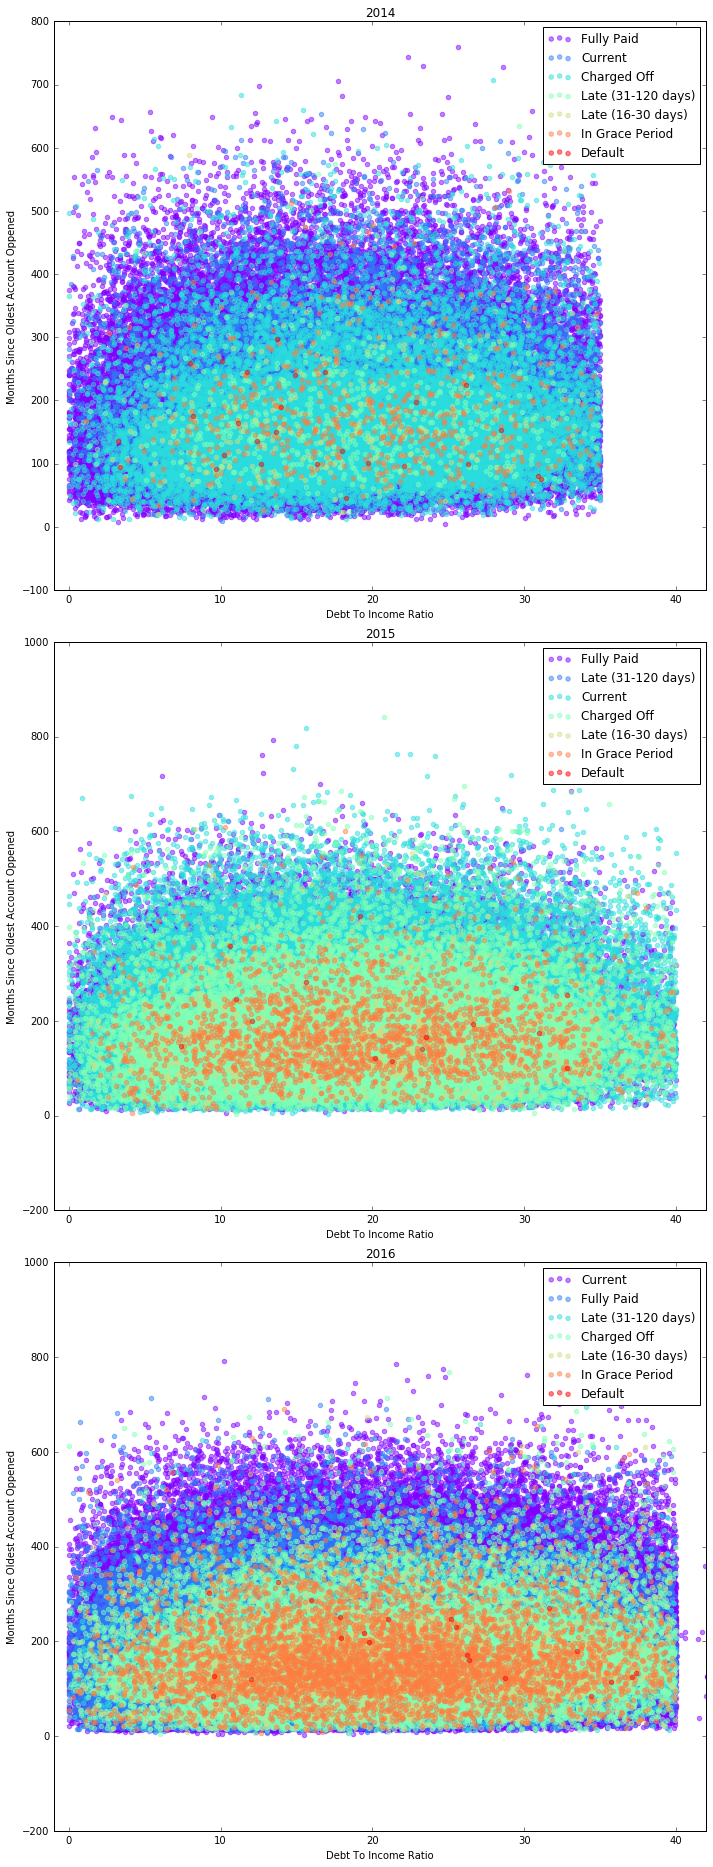

In [178]:
fig, axes = plt.subplots(3, 1, figsize=(10, 26))

plot_scatter(data, 'Debt To Income Ratio', 'Months Since Oldest Account Oppened', 2, axes)  
axes[0].set_xlim([-1,42])
axes[1].set_xlim([-1,42])
axes[2].set_xlim([-1,42])

plt.tight_layout()
plt.show()

The above scatter plot indicaes that borrowers with longer credit histories (AKA older accounts) are less likely to default. Interetingly enough, there doesn't seem to be a significant correlation between debt to income ration and defaults or late payments. 

### Interest Rate vs. Loan Amount

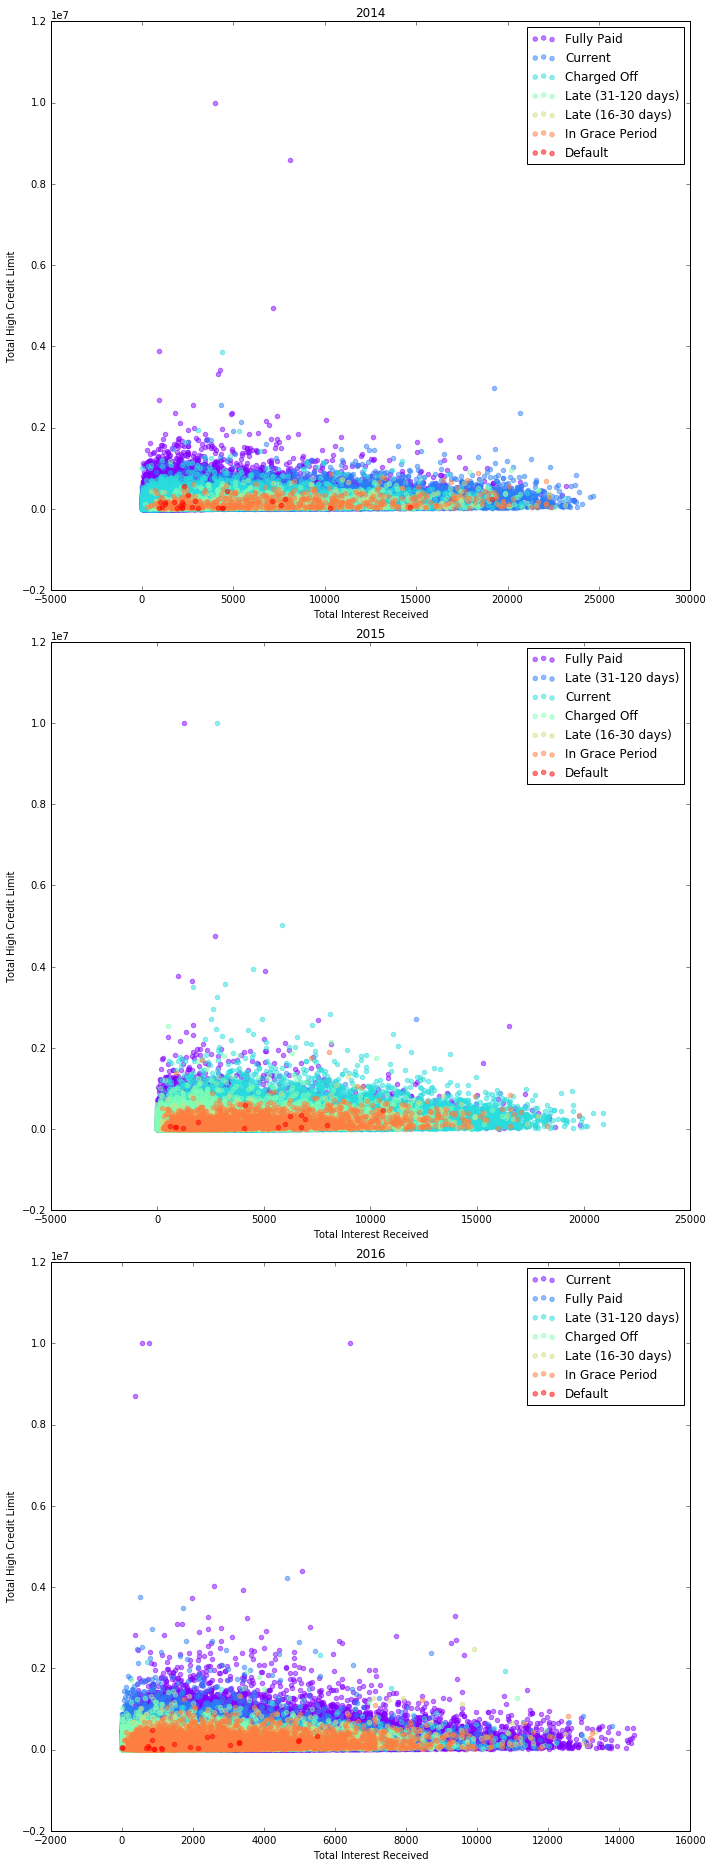

In [181]:
#print data.dti[data['loan_status'] == 'Default'].values
#print data.mo_sin_old_rev_tl_op[data['loan_status'] != 'Default'].values

def plot_scatter(data, x_lable, y_lable, groups, axes):
    #set up color map (one color per group number)
    
    datasets = [data_2014, data_2015, data]
    titles = ['2014', '2015', '2016']
    
    for i in range(len(datasets)):
        unique_values = pd.unique(datasets[i]['loan_status'])
        #split [0, 1] in to as many parts as there are groups
        group_numbers = np.linspace(0, 1,len(unique_values))
        #get a color map
        c_map = plt.get_cmap('rainbow') 
        #get a range of colors from color map
        c_norm  = colors.Normalize(vmin=0, vmax=group_numbers[-1])
        #get a map that maps a group number to a color
        number_map = cmx.ScalarMappable(norm=c_norm, cmap=c_map)

        #plot points colored by their group number
        for group, status in enumerate(unique_values):
            #convert a group number into a color using our map
            color = number_map.to_rgba(group_numbers[group])
            #make a scatter plot of a specific group colored by its group number color
            #print data.dti[data['loan_status'] == status].values.shape
            #print data.mo_sin_old_rev_tl_op[data['loan_status'] == status].values.shape
            axes[i].scatter(datasets[i].total_rec_int[datasets[i]['loan_status'] == status].values, 
                         datasets[i].tot_hi_cred_lim[datasets[i]['loan_status'] == status].values, 
                         label=str(status),
                         color=color, 
                         alpha = 0.5)
        axes[i].legend(loc='best')
        axes[i].set_title(titles[i]) 
        axes[i].set_xlabel(x_lable)
        axes[i].set_ylabel(y_lable)
        
fig, axes = plt.subplots(3, 1, figsize=(10, 26))

plot_scatter(data, 'Total Interest Received', 'Total High Credit Limit', 2, axes)  


plt.tight_layout()
plt.show()


The above scatter plot indicates that the higher a persons total credit, the less likely they are to default. Additionally, the greater the percentage of the principle that has been paid of the less likely the borrower is to default. 

### Average Current Balance vs. Number of Accounts

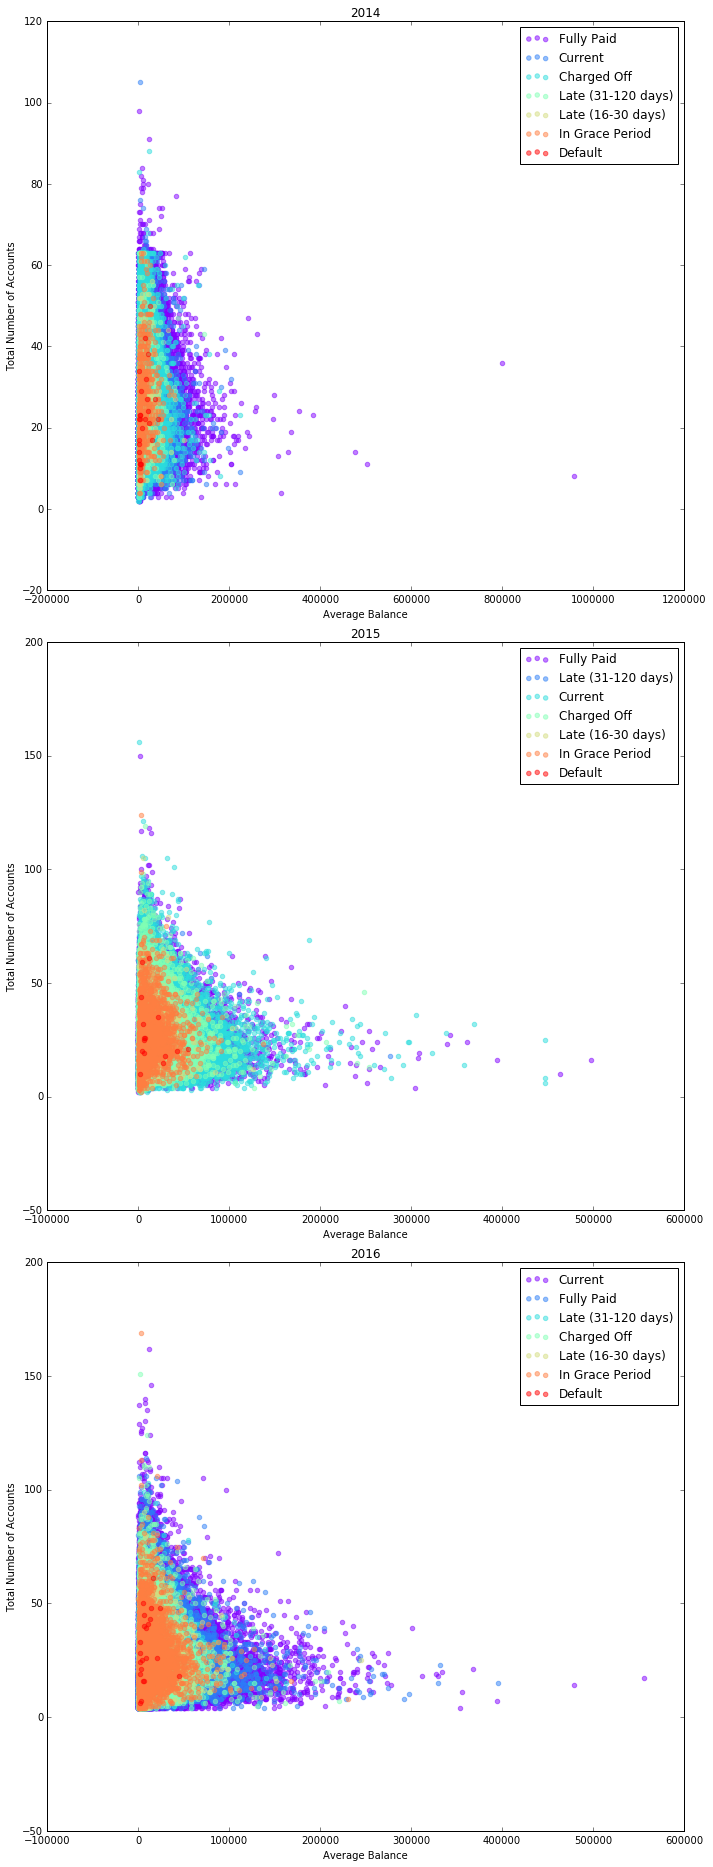

In [190]:
#print data.dti[data['loan_status'] == 'Default'].values
#print data.mo_sin_old_rev_tl_op[data['loan_status'] != 'Default'].values

def plot_scatter(data, x_lable, y_lable, groups, axes):
    #set up color map (one color per group number)
    
    datasets = [data_2014, data_2015, data]
    titles = ['2014', '2015', '2016']
    
    for i in range(len(datasets)):
        unique_values = pd.unique(datasets[i]['loan_status'])
        #split [0, 1] in to as many parts as there are groups
        group_numbers = np.linspace(0, 1,len(unique_values))
        #get a color map
        c_map = plt.get_cmap('rainbow') 
        #get a range of colors from color map
        c_norm  = colors.Normalize(vmin=0, vmax=group_numbers[-1])
        #get a map that maps a group number to a color
        number_map = cmx.ScalarMappable(norm=c_norm, cmap=c_map)

        #plot points colored by their group number
        for group, status in enumerate(unique_values):
            #convert a group number into a color using our map
            color = number_map.to_rgba(group_numbers[group])
            #make a scatter plot of a specific group colored by its group number color
            #print data.dti[data['loan_status'] == status].values.shape
            #print data.mo_sin_old_rev_tl_op[data['loan_status'] == status].values.shape
            axes[i].scatter(datasets[i].avg_cur_bal[datasets[i]['loan_status'] == status].values, 
                         datasets[i].total_acc[datasets[i]['loan_status'] == status].values, 
                         label=str(status),
                         color=color, 
                         alpha = 0.5)
        axes[i].legend(loc='best')
        axes[i].set_title(titles[i]) 
        axes[i].set_xlabel(x_lable)
        axes[i].set_ylabel(y_lable)
        
fig, axes = plt.subplots(3, 1, figsize=(10, 26))

plot_scatter(data, 'Average Balance', 'Total Number of Accounts', 2, axes)  


plt.tight_layout()
plt.show()


The above plot indicates that almost all defaults occur when people have lower average account balances. Only a few defaults occurred when peoples average balance was over 40,000 and none occurred when the average account balance was over 100,000.

### Annual Income vs.  Amount of Loan Funded in Dollars

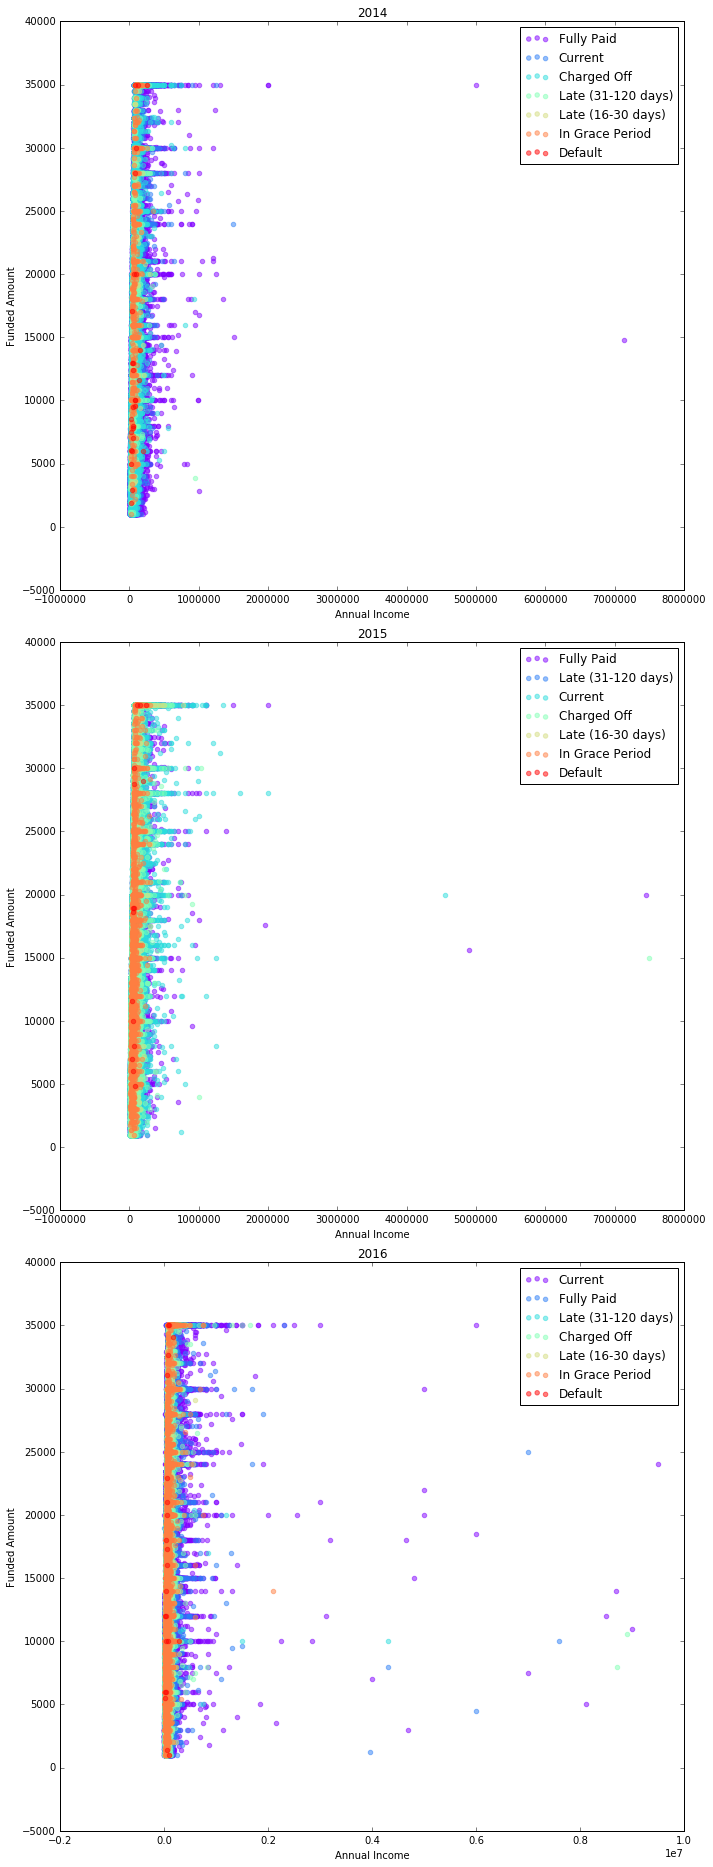

In [192]:
#print data.dti[data['loan_status'] == 'Default'].values
#print data.mo_sin_old_rev_tl_op[data['loan_status'] != 'Default'].values

def plot_scatter(data, x_lable, y_lable, groups, axes):
    #set up color map (one color per group number)
    
    datasets = [data_2014, data_2015, data]
    titles = ['2014', '2015', '2016']
    
    for i in range(len(datasets)):
        unique_values = pd.unique(datasets[i]['loan_status'])
        #split [0, 1] in to as many parts as there are groups
        group_numbers = np.linspace(0, 1,len(unique_values))
        #get a color map
        c_map = plt.get_cmap('rainbow') 
        #get a range of colors from color map
        c_norm  = colors.Normalize(vmin=0, vmax=group_numbers[-1])
        #get a map that maps a group number to a color
        number_map = cmx.ScalarMappable(norm=c_norm, cmap=c_map)

        #plot points colored by their group number
        for group, status in enumerate(unique_values):
            #convert a group number into a color using our map
            color = number_map.to_rgba(group_numbers[group])
            #make a scatter plot of a specific group colored by its group number color
            #print data.dti[data['loan_status'] == status].values.shape
            #print data.mo_sin_old_rev_tl_op[data['loan_status'] == status].values.shape
            axes[i].scatter(datasets[i].annual_inc[datasets[i]['loan_status'] == status].values, 
                         datasets[i].funded_amnt[datasets[i]['loan_status'] == status].values, 
                         label=str(status),
                         color=color, 
                         alpha = 0.5)
        axes[i].legend(loc='best')
        axes[i].set_title(titles[i]) 
        axes[i].set_xlabel(x_lable)
        axes[i].set_ylabel(y_lable)
        
fig, axes = plt.subplots(3, 1, figsize=(10, 26))

plot_scatter(data, 'Annual Income', 'Funded Amount', 2, axes)  


plt.tight_layout()
plt.show()


The above plot indicates that while the portion of the loan that has been paid off is correlated with the likelyhood of default, the absolute amount of money contributed to the paying off the principle does not appear to be correlated. 

As expected, most defaults appear to occur when borrowers earn a lower income. As with average account balance, there is a cap at which beyond 100,000 in annual income we have not observed any defaults. 

### Credit Grade vs. Interest Rate

In [189]:
#plot 2 variables in scatter plot
#this function assums x is CATEGORICAL
def plot_scatter_2vars_xcat(data, plot_title, x_var_name, x_label, y_var_name, y_label, axes):
    #set up color map (one color per group number)
    
    unique_values = pd.unique(data['loan_status'])
    #split [0, 1] in to as many parts as there are groups
    group_numbers = np.linspace(0, 1,len(unique_values))
    #get a color map
    c_map = plt.get_cmap('rainbow') 
    #get a range of colors from color map
    c_norm  = colors.Normalize(vmin=0, vmax=group_numbers[-1])
    #get a map that maps a group number to a color
    number_map = cmx.ScalarMappable(norm=c_norm, cmap=c_map)
    
    #plot points colored by their group number
    for group, status in enumerate(unique_values):
        #convert a group number into a color using our map
        color = number_map.to_rgba(group_numbers[group])
        #make a scatter plot of a specific group colored by its group number color
        #print data[data['loan_status'] == status][x_var_name].values.shape
        #print data[data['loan_status'] == status][y_var_name].values.shape
        dummies = pd.get_dummies(data[data['loan_status'] == status][x_var_name])
        dummie_labels = dummies.columns
        x_values = np.argmax(dummies.values, axis=1)
        axes.scatter(x_values,
                     data[data['loan_status'] == status][y_var_name].values, 
                     label=str(status),
                     color=color, 
                     alpha = 0.5)
    axes.legend(loc='best')
    axes.set_title(plot_title) 
    axes.set_xlabel(x_label)
    #add padding to the x tick labels
    xticks = ['']
    xticks = xticks + list((dummie_labels.values))
    axes.set_xticklabels(xticks)
    axes.set_ylabel(y_label)

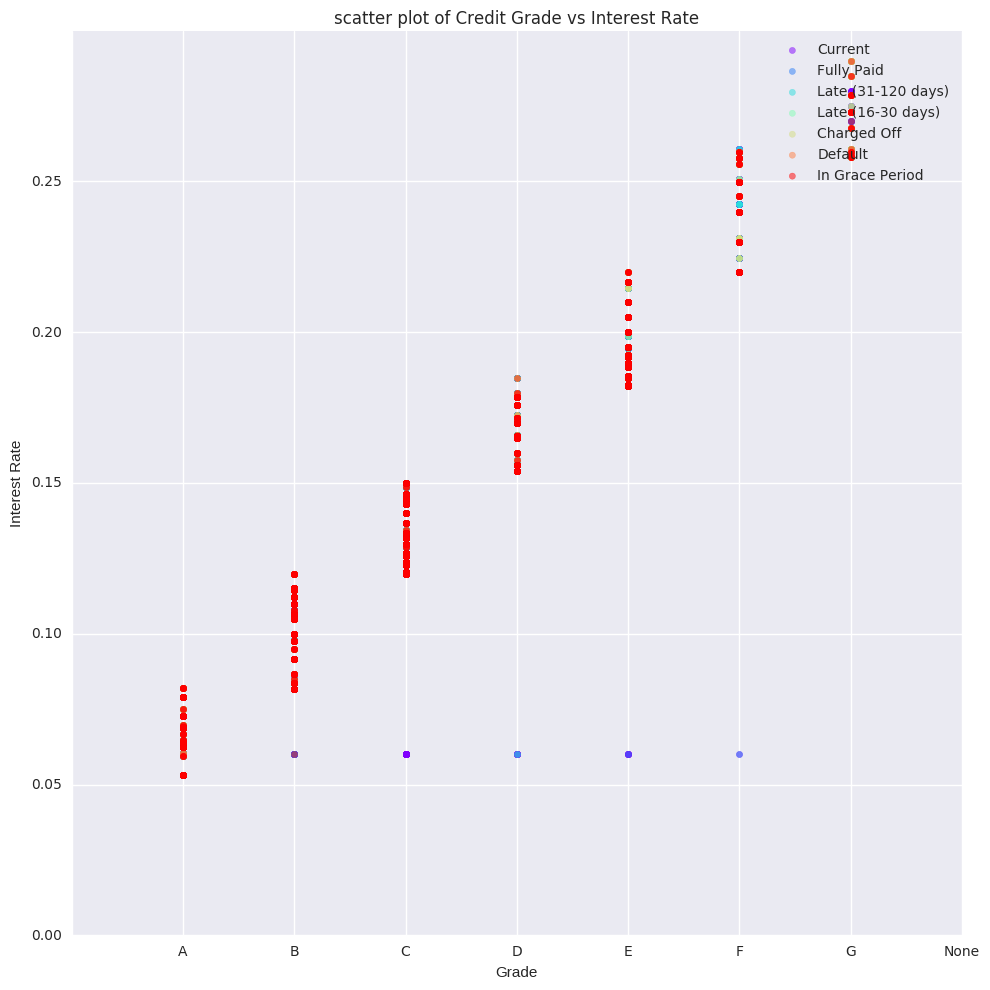

In [216]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))

plot_scatter_2vars_xcat(data, 'scatter plot of Credit Grade vs Interest Rate',
                        'grade', 'Grade',
                        'int_rate', 'Interest Rate',
                        ax1)  

#no need to set x axis limits for categorical plots
#ax1.set_xlim([-1,8])
ax1.set_ylim([0, 0.3])

plt.tight_layout()
plt.show()

In [217]:
def plot_scatter_2vars(data, plot_title, x_var_name, x_label, y_var_name, y_label, axes):
    #set up color map (one color per group number)
    
    unique_values = pd.unique(data['loan_status'])
    #split [0, 1] in to as many parts as there are groups
    group_numbers = np.linspace(0, 1,len(unique_values))
    #get a color map
    c_map = plt.get_cmap('rainbow') 
    #get a range of colors from color map
    c_norm  = colors.Normalize(vmin=0, vmax=group_numbers[-1])
    #get a map that maps a group number to a color
    number_map = cmx.ScalarMappable(norm=c_norm, cmap=c_map)
    
    #plot points colored by their group number
    for group, status in enumerate(unique_values):
        #convert a group number into a color using our map
        color = number_map.to_rgba(group_numbers[group])
        #make a scatter plot of a specific group colored by its group number color
        #print data[data['loan_status'] == status][x_var_name].values.shape
        #print data[data['loan_status'] == status][y_var_name].values.shape
        axes.scatter(data[data['loan_status'] == status][x_var_name].values,
                     data[data['loan_status'] == status][y_var_name].values, 
                     label=str(status),
                     color=color, 
                     alpha = 0.5)
    axes.legend(loc='best')
    axes.set_title(plot_title) 
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)

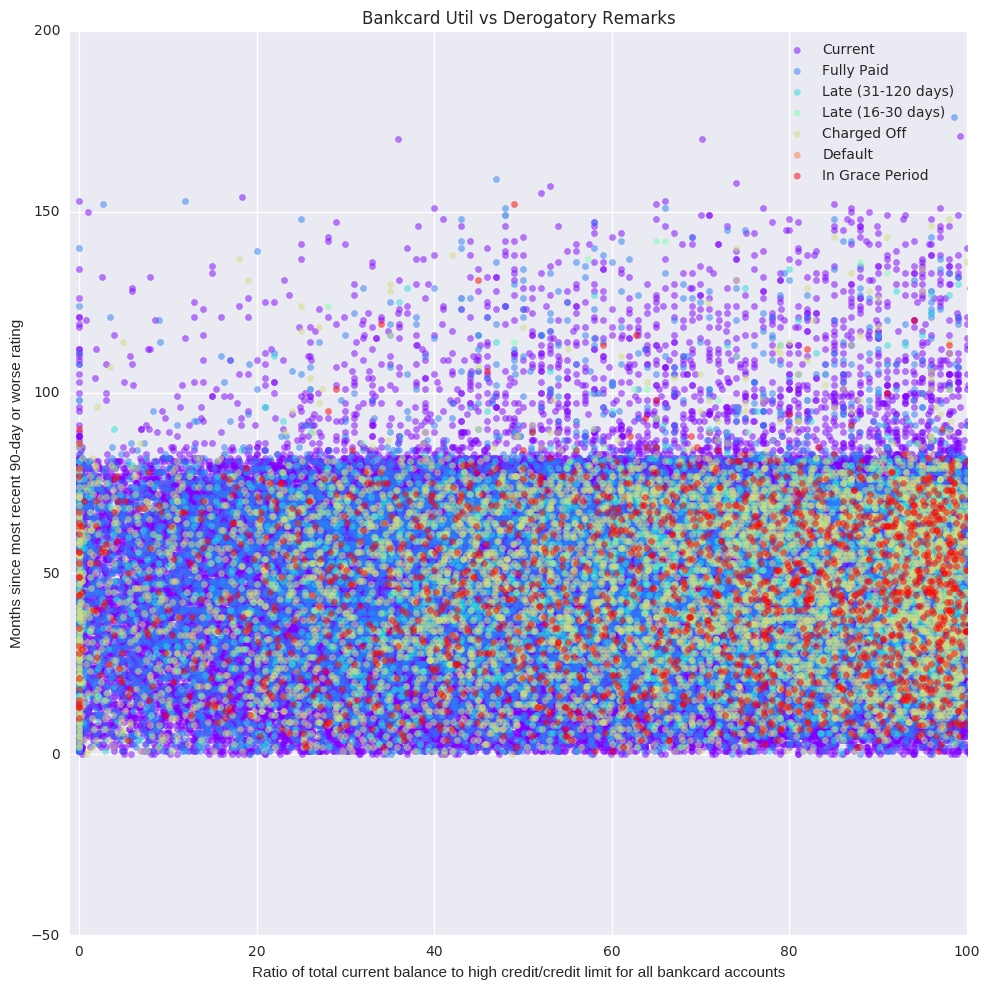

In [218]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))

plot_scatter_2vars(data, 'Bankcard Util vs Derogatory Remarks',
                   'bc_util', 'Ratio of total current balance to high credit/credit limit for all bankcard accounts',
                   'mths_since_last_major_derog', 'Months since most recent 90-day or worse rating',
                   ax1)  

ax1.set_xlim([-1, 100])
#ax1.set_ylim([0, 0.003])

plt.tight_layout()
plt.show()

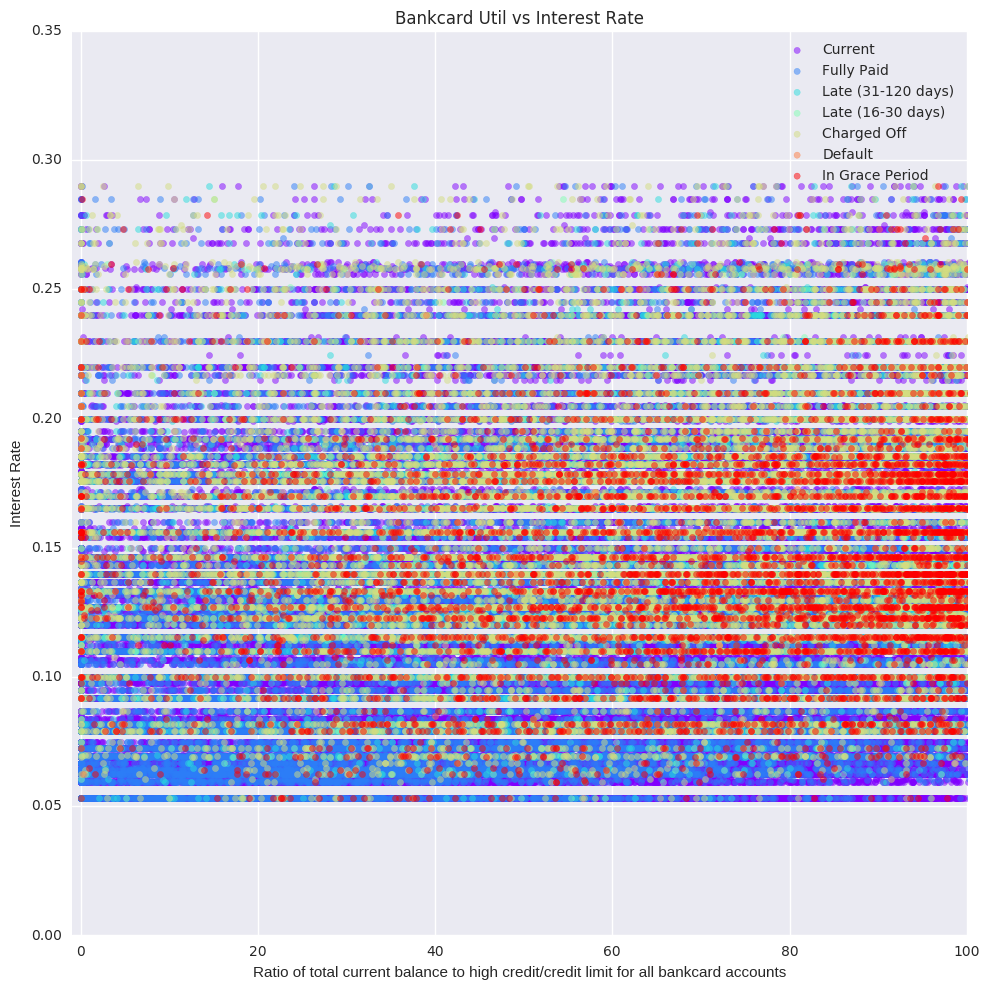

In [220]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))

plot_scatter_2vars(data, 'Bankcard Util vs Interest Rate',
                   'bc_util', 'Ratio of total current balance to high credit/credit limit for all bankcard accounts',
                   'int_rate', 'Interest Rate',
                   ax1)  

ax1.set_xlim([-1, 100])
#ax1.set_ylim([0, 0.003])

plt.tight_layout()
plt.show()